# 1. Data wrangling<a id='1_Data_wrangling'></a>

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import lightgbm as lgb
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, auc, average_precision_score, make_scorer, fbeta_score,  accuracy_score, precision_score, recall_score, fbeta_score
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

## 1.1 Data imports<a id='1.2_Imports'></a>

In [2]:
# Load dataset
df = pd.read_csv("Data//data.csv")

In [3]:
df.head()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   
3                0.998700                    0.796967   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   

   ...   Net Income to Total Assets   Total assets to GNP price  \
0  ...                     0.716845                    0.009219   
1  ...                     0.795297                    0.008323   
2  ...                     0.774670                    0.040003   
3  ...                     0.739555                    0.003252   
4  ...                     0.795016                    0.003878   

    No-credit Interval   Gross Profit to Sales  \
0             0.622879                0.601453   
1             0.623652                0.610237   
2             0.623841                0.601449   
3             0.622929                0.583538   
4             0.623521                0.598782   

    Net Income to Stockholder's Equity   Liability to Equity  \
0                             0.827890              0.290202   
1                             0.839969              0.283846   
2                             0.836774              0.290189   
3                             0.834697              0.281721   
4                             0.839973              0.278514   

    Degree of Financial Leverage (DFL)  \
0                             0.026601   
1                             0.264577   
2                             0.026555   
3                             0.026697   
4                             0.024752   

    Interest Coverage Ratio (Interest expense to EBIT)   Net Income Flag  \
0                                           0.564050                   1   
1                                           0.570175                   1   
2                                           0.563706                   1   
3                                           0.564663                   1   
4                        

In [4]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

This dataset is related to bankruptcy prediction, containing 6819 entries and 96 columns. As you can see in the above output, all of the features are numeric variables, float or int. 

## 1.2 Dataset: Target and features

The columns represent various financial ratios and metrics. Here’s a more detailed breakdown of some key aspects of the dataset.

### 1.2.1 Target Variable

Bankrupt ?: This is likely the target variable indicating whether a company is bankrupt (1) or not (0).

### 1.2.2 Features: Financial Ratios and Metrics

This dataset consists of 95 features, which can be broadly categorized into the following six groups.  

#### 1.2.2.1 Profitability Ratios: 

These ratios are used to assess a company's ability to generate profits. These ratios are typically calculated by comparing profit to other financial measures such as assets, shareholder equity, or revenue. High profitability ratios indicate that a company is generating more profit from its operations.

* ROA(C) before interest and depreciation before interest (1)
* ROA(A) before interest and % after tax (2)
* ROA(B) before interest and depreciation after tax (3)
* Operating Gross Margin (4)
* Realized Sales Gross Margin (5)
* Operating Profit Rate (6)
* Pre-tax net Interest Rate (7)
* After-tax net Interest Rate (8)
* Non-industry income and expenditure/revenue (9)
* Net Value Per Share (B) (16)
* Net Value Per Share (A) (17)
* Net Value Per Share (C) (18)
* Persistent EPS in the Last Four Seasons (19)
* Cash Flow Per Share (20)
* Revenue Per Share (Yuan) (21)
* Operating Profit Per Share (Yuan) (22)
* Per Share Net profit before tax (Yuan) (23)
* Realized Sales Gross Profit Growth Rate (24)
* Operating Profit Growth Rate (25)
* After-tax Net Profit Growth Rate (26)
* Regular Net Profit Growth Rate (27)
* Continuous Net Profit Growth Rate (28)
* Net Income to Total Assets (86)
* Net Income to Stockholder's Equity (90)

#### 1.2.2.2 Liquidity Ratios: 

The ratios are used to assess a company's ability to pay its short-term debts. These ratios are typically calculated by comparing current assets to current liabilities. A high liquidity ratio indicates that a company has enough cash and other current assets to meet its short-term obligations.

* Current Ratio (33)
* Quick Ratio (34)
* Cash Flow to Sales (75)
* Current Asset Turnover Rate (71)
* Quick Asset Turnover Rate (72)
* Working capitcal Turnover Rate (73)
* Cash Turnover Rate (74)
* Current Liability to Current Assets (84)

#### 1.2.2.3 Solvency Ratios: 

Solvency ratios are used to assess a company's ability to pay its long-term debts. These ratios typically compare a company's debt levels to its assets, equity, and earnings. A high solvency ratio indicates that a company is likely to be able to meet its long-term obligations.

* Debt ratio % (37)
* Net worth/Assets (38)
* Total debt/Total net worth (36)
* Long-term fund suitability ratio (A) (39)
* Borrowing dependency (40)
* Contingent liabilities/Net worth (41)
* Liability to Assets (60)
* Current Liabilities/Equity (66)
* Long-term Liability to Current Assets (67)
* Retained Earnings to Total Assets (68)
* Liability to Equity (91)
* Equity to Long-term Liability (79)

#### 1.2.2.4 Efficiency Ratios:

Efficiency ratios in financial analysis are metrics used to evaluate how effectively a company utilizes its assets and liabilities to generate revenues or profits. These ratios provide insights into the operational efficiency and performance of a company.

* Total Asset Turnover (45)
* Accounts Receivable Turnover (46)
* Average Collection Days (47)
* Inventory Turnover Rate (times) (48)
* Fixed Assets Turnover Frequency (49)
* Net Worth Turnover Rate (times) (50)
* Revenue per person (51)
* Operating profit per person (52)
* Inventory/Working Capital (62)
* Inventory/Current Liability (63)
* Working Capital to Equity (65)
* Cash Flow to Total Assets (80)
* Cash Flow to Liability (81)
* CFO to Assets (82)
* Cash Flow to Equity (83)

#### 1.2.2.5 Growth Ratios: 

Efficiency ratios are used to assess how well a company uses its assets and manages its expenses. These ratios typically compare a company's sales or profits to various measures of its operations. High efficiency ratios indicate that a company is using its resources effectively to generate revenue and profit.

* Total Asset Growth Rate (29)
* Net Value Growth Rate (30)
* Total Asset Return Growth Rate Ratio (31)
* Cash Reinvestment % (32)

#### 1.2.2.6 Other: 

In addition to the above categories, there are a number of other financial ratios that can be used to analyze a company's financial performance. These ratios may focus on specific aspects of a company's operations, such as its cash flow, profitability, or risk profile.

* Interest Expense Ratio (35)
* Operating profit/Paid-in capital (42)
* Net profit before tax/Paid-in capital (43)
* Inventory and accounts receivable/Net value (44)
* Working Capital to Total Assets (54)
* Quick Assets/Total Assets (55)
* Current Assets/Total Assets (56)
* Cash/Total Assets (57)
* Quick Assets/Current Liability (58)
* Cash/Current Liability (59)
* Operating Funds to Liability (61)
* Current Liability to Liability (64)
* Fixed Assets to Assets (76)
* No-credit Interval (88)
* Gross Profit to Sales (89)
* Degree of Financial Leverage (DFL) (92)
* Interest Coverage Ratio (Interest expense to EBIT) (93)
* Net Income Flag (94)
* Total assets to GNP price (87)

Later in the EDA process, we will see that there is a high likelihood of features exhibiting strong correlations within the same category.

## 1.3 Naming problem

As we can see from above information output, the variable names in the dataset have some issues, such as leading spaces and unclear naming. These issues can make data analysis more difficult. Here are the steps to clean and rename the columns for better clarity and usability:

* Remove Leading Spaces: Many column names have leading spaces that should be removed.
* Clarify Variable Names: Some names are unclear and can be made more descriptive. 

To make these works convinient, I contructed the following simple function.

In [5]:
# Function to clean column names
def clean_column_names(col):
    col = col.replace(' (times)', '') # Remove ' (times)'
    col = col.replace(' (Yuan ¥)', '') # Remove ' (Yuan ??)'
    col = col.replace('?', '')  # Remove question marks
    col = col.strip()  # Remove leading and trailing spaces
    col = col.replace(' ', '_')  # Replace spaces with underscores
    col = col.replace('%', 'pct')  # Replace % with 'percent'
    col = col.replace('/', '_to_')  # Replace / with '_to_'
    col = col.replace('(', '')  # Remove opening parentheses
    col = col.replace(')', '')  # Remove closing parentheses
    col = re.sub(r'_([a-z])', lambda x: '_' + x.group(1).upper(), col) # Convert first letter after underscore to uppercase
    return col

# Apply the function to all column names
df.columns = [clean_column_names(col) for col in df.columns]

# Display the cleaned column names
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Bankrupt                                               6819 non-null   int64  
 1   ROAC_Before_Interest_And_Depreciation_Before_Interest  6819 non-null   float64
 2   ROAA_Before_Interest_And_Pct_After_Tax                 6819 non-null   float64
 3   ROAB_Before_Interest_And_Depreciation_After_Tax        6819 non-null   float64
 4   Operating_Gross_Margin                                 6819 non-null   float64
 5   Realized_Sales_Gross_Margin                            6819 non-null   float64
 6   Operating_Profit_Rate                                  6819 non-null   float64
 7   Pre-tax_Net_Interest_Rate                              6819 non-null   float64
 8   After-tax_Net_Interest_Rate                     

## 1.4 Data type conversion

Next, we need to consider the data type of each column. Firstly, 'Bankrupt' is a binary target variable where one indicates bankruptcy and zero indicates otherwise. The features are numerical except for two, namely 'Net_Income_Flag' and 'Liability-Assets_Flag'. 'Net_Income_Flag' is one if net income is negative for the last two years; zero otherwise. 'Liability-Assets_Flag' is also a binary feature,  one if Total Liability exceeds Total Assets, 0 otherwise. Thus we need to change the data type of those to categorical variable.

In [6]:
# Convert binary variables to categorical
binary_columns = ['Bankrupt', 'Net_Income_Flag', 'Liability-Assets_Flag']
df[binary_columns] = df[binary_columns].astype('category')
print(df[binary_columns].dtypes)

Bankrupt                 category
Net_Income_Flag          category
Liability-Assets_Flag    category
dtype: object


## 1.5 Missing values and duplicated rows

### 1.5.1 Number of Missing Values By Column

In [7]:
# Check out the missing values
missing = pd.concat([df.isna().sum(), 100 * df.isna().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending = False)

count    %
Bankrupt                                                0  0.0
ROAC_Before_Interest_And_Depreciation_Before_In...      0  0.0
Total_Expense_To_Assets                                 0  0.0
Total_Income_To_Total_Expense                           0  0.0
Retained_Earnings_To_Total_Assets                       0  0.0
...                                                   ...  ...
Total_Asset_Growth_Rate                                 0  0.0
Continuous_Net_Profit_Growth_Rate                       0  0.0
Regular_Net_Profit_Growth_Rate                          0  0.0
After-tax_Net_Profit_Growth_Rate                        0  0.0
Equity_To_Liability                                     0  0.0

[96 rows x 2 columns]

All of the columns of the dataset does not have missing values.


### 1.5.2 Number of duplicated rows

Then let's check out the duplicated values.

In [8]:
# Check out duplicated values
print("The numbe of duplicated rows: ", df.duplicated().sum())

The numbe of duplicated rows:  0


There are no duplicated rows in the dataset.

## 1.6 Exploring data by type

### 1.6.1 Categorical variables

The dataset has three categorical variables, one in target and two in features.

In [9]:
df.select_dtypes('category')

Bankrupt Liability-Assets_Flag Net_Income_Flag
0           1                     0               1
1           1                     0               1
2           1                     0               1
3           1                     0               1
4           1                     0               1
...       ...                   ...             ...
6814        0                     0               1
6815        0                     0               1
6816        0                     0               1
6817        0                     0               1
6818        0                     0               1

[6819 rows x 3 columns]

#### 1.6.1.1 Target variable

The 'Bankrupt' is a binary variable. Let's investigate the proportion of bankrupt(1) and non-bankrupt(0).

C:\Users\james\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


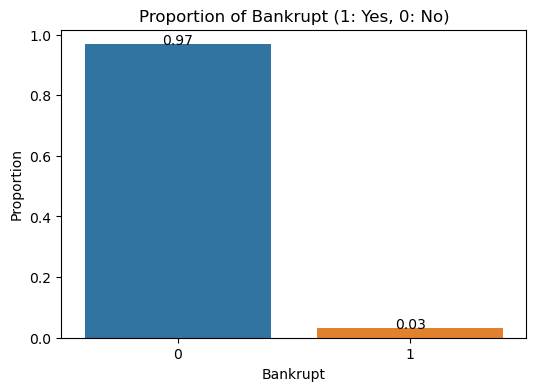

In [10]:
# 'Bankrupt' value count
value_prop = df['Bankrupt'].value_counts(normalize=True)

# Visualization
plt.figure(figsize=(6, 4))
sns.barplot(x=value_prop.index, y=value_prop.values)

for index, value in enumerate(value_prop):
    plt.text(index, value, f"{value:.2f}", color='black', ha='center')
    
plt.xlabel('Bankrupt')
plt.ylabel('Proportion')
plt.title('Proportion of Bankrupt (1: Yes, 0: No)')
plt.show()

The target variable is highly imbalanced with 97% of 0 and 3% of 1, which can lead to various issues in model performance and evaluation. Such imbalance might cause the model to be biased towards the majority class, resulting in poor prediction accuracy for the minority class. In subsequent chapters, we will address these issues by implementing data preprocessing techniques specifically designed to handle imbalanced datasets. These techniques will help ensure that our model performs well across all classes.

#### 1.6.1.2 Categorical Features

Both of the categorical features are binary. Take a look at the proportion of one in each feature.

In [11]:
# Calculate the proportion of value 1 in 'Liability-Assets_Flag'
df[df['Liability-Assets_Flag'] == 1].shape[0]/df.shape[0] * 100

0.11731925502273059

In [12]:
# Calculate the proportion of value 1 in 'Net_Income_Flag'
df[df['Net_Income_Flag'] == 1].shape[0] / df.shape[0] * 100

100.0

Since all the values of "Net_Income_Flag" are 1, this feature does not provide any useful information for your model. It is a constant feature, which means it doesn't help in distinguishing between different data points. Thus, we can remove the feature from the dataset.

In [13]:
df.drop(columns = 'Net_Income_Flag', inplace=True)

#### 1.6.1.3. Distribution of 'Bankrupt' by 'Liability-Assets_Flag'

Even though it would be a part of EDA, I'm looking into the relationship between the 'Bankrupt'and 'Liability-Assets_Flag'.

In [14]:
bankrupt_by_LAF = df.groupby('Liability-Assets_Flag')['Bankrupt'].value_counts(normalize=True)
print(bankrupt_by_LAF)

Liability-Assets_Flag  Bankrupt
0                      0           0.96858
                       1           0.03142
1                      1           0.75000
                       0           0.25000
Name: proportion, dtype: float64


C:\Users\james\AppData\Local\Temp\ipykernel_14012\178612186.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bankrupt_by_LAF = df.groupby('Liability-Assets_Flag')['Bankrupt'].value_counts(normalize=True)


Liability-Assets Flag is found to be a significant predictor in bankruptcy prediction.

### 1.6.2 Numerical Features

In [15]:
### Numerical data summary
df_summary = df.describe().T
df_summary

count      mean  \
ROAC_Before_Interest_And_Depreciation_Before_In...  6819.0  0.505180   
ROAA_Before_Interest_And_Pct_After_Tax              6819.0  0.558625   
ROAB_Before_Interest_And_Depreciation_After_Tax     6819.0  0.553589   
Operating_Gross_Margin                              6819.0  0.607948   
Realized_Sales_Gross_Margin                         6819.0  0.607929   
...                                                    ...       ...   
Net_Income_To_Stockholder's_Equity                  6819.0  0.840402   
Liability_To_Equity                                 6819.0  0.280365   
Degree_Of_Financial_Leverage_DFL                    6819.0  0.027541   
Interest_Coverage_Ratio_Interest_Expense_To_EBIT    6819.0  0.565358   
Equity_To_Liability                                 6819.0  0.047578   

                                                         std  min       25%  \
ROAC_Before_Interest_And_Depreciation_Before_In...  0.060686  0.0  0.476527   
ROAA_Before_Interest_And_Pct_After_Tax              0.065620  0.0  0.535543   
ROAB_Before_Interest_And_Depreciation_After_Tax     0.061595  0.0  0.527277   
Operating_Gross_Margin                              0.016934  0.0  0.600445   
Realized_Sales_Gross_Margin                         0.016916  0.0  0.600434   
...                                                      ...  ...       ...   
Net_Income_To_Stockholder's_Equity                  0.014523  0.0  0.840115   
Liability_To_Equity                                 0.014463  0.0  0.276944   
Degree_Of_Financial_Leverage_DFL                    0.015668  0.0  0.026791   
Interest_Coverage_Ratio_Interest_Expense_To_EBIT    0.013214  0.0  0.565158   
Equity_To_Liability                                 0.050014  0.0  0.024477   

                                                         50%       75%  max  
ROAC_Before_Interest_And_Depreciation_Before_In...  0.502706  0.535563  1.0  
ROAA_Before_Interest_And_Pct_After_Tax              0.559802  0.589157  1.0  
ROAB_Before_Interest_And_Depreciation_After_Tax     0.552278  0.584105  1.0  
Operating_Gross_Margin                              0.605997  0.613914  1.0  
Realized_Sales_Gross_Margin                         0.605976  0.613842  1.0  
...                                                      ...       ...  ...  
Net_Income_To_Stockholder's_Equity                  0.841179  0.842357  1.0  
Liability_To_Equity                                 0.278778  0.281449  1.0  
Degree_Of_Financial_Leverage_DFL                    0.026808  0.026913  1.0  
Interest_Coverage_Ratio_Interest_Expense_To_EBIT    0.565252  0.565725  1.0  
Equity_To_Liability                                 0.033798  0.052838  1.0  

[93 rows x 8 columns]

In [16]:
df_summary[df_summary['max'] == 1].shape

(69, 8)

In [17]:
df_summary[df_summary['min'] == 0].shape

(93, 8)

Upon examining the summary statistics for the numerical variables, it is observed that 63 variables have a minimum value of 0 and a maximum value of 1. This suggests that these features have been normalized using their range. Variables with maximum values not equal to 1 will need further investigation. So, let's generate new sub-dataset which only contains the features with max greater than 1.

In [18]:
# Identify the columns where the max value is greater than 1
columns_with_max_greater_than_1 = df_summary.loc[df_summary['max'] > 1].index

# Create a new DataFrame with only the columns where the max value is greater than 1
df_max_greater_than_one = df.loc[:, columns_with_max_greater_than_1]

In [19]:
# Summary of df_max_greater_than_one
df_max_greater_than_one.describe().T

count          mean           std  \
Operating_Expense_Rate                 6819.0  1.995347e+09  3.237684e+09   
Research_And_Development_Expense_Rate  6819.0  1.950427e+09  2.598292e+09   
Interest-bearing_Debt_Interest_Rate    6819.0  1.644801e+07  1.082750e+08   
Revenue_Per_Share                      6819.0  1.328641e+06  5.170709e+07   
Total_Asset_Growth_Rate                6819.0  5.508097e+09  2.897718e+09   
Net_Value_Growth_Rate                  6819.0  1.566212e+06  1.141594e+08   
Current_Ratio                          6819.0  4.032850e+05  3.330216e+07   
Quick_Ratio                            6819.0  8.376595e+06  2.446847e+08   
Total_Debt_To_Total_Net_Worth          6819.0  4.416337e+06  1.684069e+08   
Accounts_Receivable_Turnover           6819.0  1.278971e+07  2.782598e+08   
Average_Collection_Days                6819.0  9.826221e+06  2.563589e+08   
Inventory_Turnover_Rate                6819.0  2.149106e+09  3.247967e+09   
Fixed_Assets_Turnover_Frequency        6819.0  1.008596e+09  2.477557e+09   
Revenue_Per_Person                     6819.0  2.325854e+06  1.366327e+08   
Allocation_Rate_Per_Person             6819.0  1.125579e+07  2.945063e+08   
Quick_Assets_To_Current_Liability      6819.0  3.592902e+06  1.716209e+08   
Cash_To_Current_Liability              6819.0  3.715999e+07  5.103509e+08   
Inventory_To_Current_Liability         6819.0  5.580680e+07  5.820516e+08   
Long-term_Liability_To_Current_Assets  6819.0  5.416004e+07  5.702706e+08   
Current_Asset_Turnover_Rate            6819.0  1.195856e+09  2.821161e+09   
Quick_Asset_Turnover_Rate              6819.0  2.163735e+09  3.374944e+09   
Cash_Turnover_Rate                     6819.0  2.471977e+09  2.938623e+09   
Fixed_Assets_To_Assets                 6819.0  1.220121e+06  1.007542e+08   
Total_Assets_To_GNP_Price              6819.0  1.862942e+07  3.764501e+08   

                                       min           25%           50%  \
Operating_Expense_Rate                 0.0  1.566874e-04  2.777589e-04   
Research_And_Development_Expense_Rate  0.0  1.281880e-04  5.090000e+08   
Interest-bearing_Debt_Interest_Rate    0.0  2.030203e-04  3.210321e-04   
Revenue_Per_Share                      0.0  1.563138e-02  2.737571e-02   
Total_Asset_Growth_Rate                0.0  4.860000e+09  6.400000e+09   
Net_Value_Growth_Rate                  0.0  4.409689e-04  4.619555e-04   
Current_Ratio                          0.0  7.555047e-03  1.058717e-02   
Quick_Ratio                            0.0  4.725903e-03  7.412472e-03   
Total_Debt_To_Total_Net_Worth          0.0  3.007049e-03  5.546284e-03   
Accounts_Receivable_Turnover           0.0  7.101336e-04  9.678107e-04   
Average_Collection_Days                0.0  4.386530e-03  6.572537e-03   
Inventory_Turnover_Rate                0.0  1.728256e-04  7.646743e-04   
Fixed_Assets_Turnover_Frequency        0.0  2.330013e-04  5.930942e-04   
Revenue_Per_Person                     0.0  1.043285e-02  1.861551e-02   
Allocation_Rate_Per_Person             0.0  4.120529e-03  7.844373e-03   
Quick_Assets_To_Current_Liability      0.0  5.239776e-03  7.908898e-03   
Cash_To_Current_Liability              0.0  1.973008e-03  4.903886e-03   
Inventory_To_Current_Liability         0.0  3.163148e-03  6.497335e-03   
Long-term_Liability_To_Current_Assets  0.0  0.000000e+00  1.974619e-03   
Current_Asset_Turnover_Rate            0.0  1.456236e-04  1.987816e-04   
Quick_Asset_Turnover_Rate              0.0  1.417149e-04  2.247728e-04   
Cash_Turnover_Rate                     0.0  2.735337e-04  1.080000e+09   
Fixed_Assets_To_Assets                 0.0  8.536037e-02  1.968810e-01   
Total_Assets_To_GNP_Price              0.0  9.036205e-04  2.085213e-03   

                                                75%           max  
Operating_Expense_Rate                 4.145000e+09  9.990000e+09  
Research_And_Development_Expense_Rate  3.450000e+09  9.980000e+09  
Interest-bearing_Debt_Interest_Rate    5.325533e-04  9.9000

The table above shows that the mean is much larger and the standard deviation is also very large compared to the quartile values. This indicates a potential distortion in the distribution due to outliers. We will explore the process of checking for outliers in numerical variables in the following section.

#### 1.6.2.1 Distribution of all numerical features
We create a subset of the dataset containing only the numerical features in order to examine the distribution of the numerical variables. Then, we draw a histogram of all numerical features.

In [20]:
# Seperate the numerical data from original dataset
numeric_df = df.select_dtypes(include=['number'])

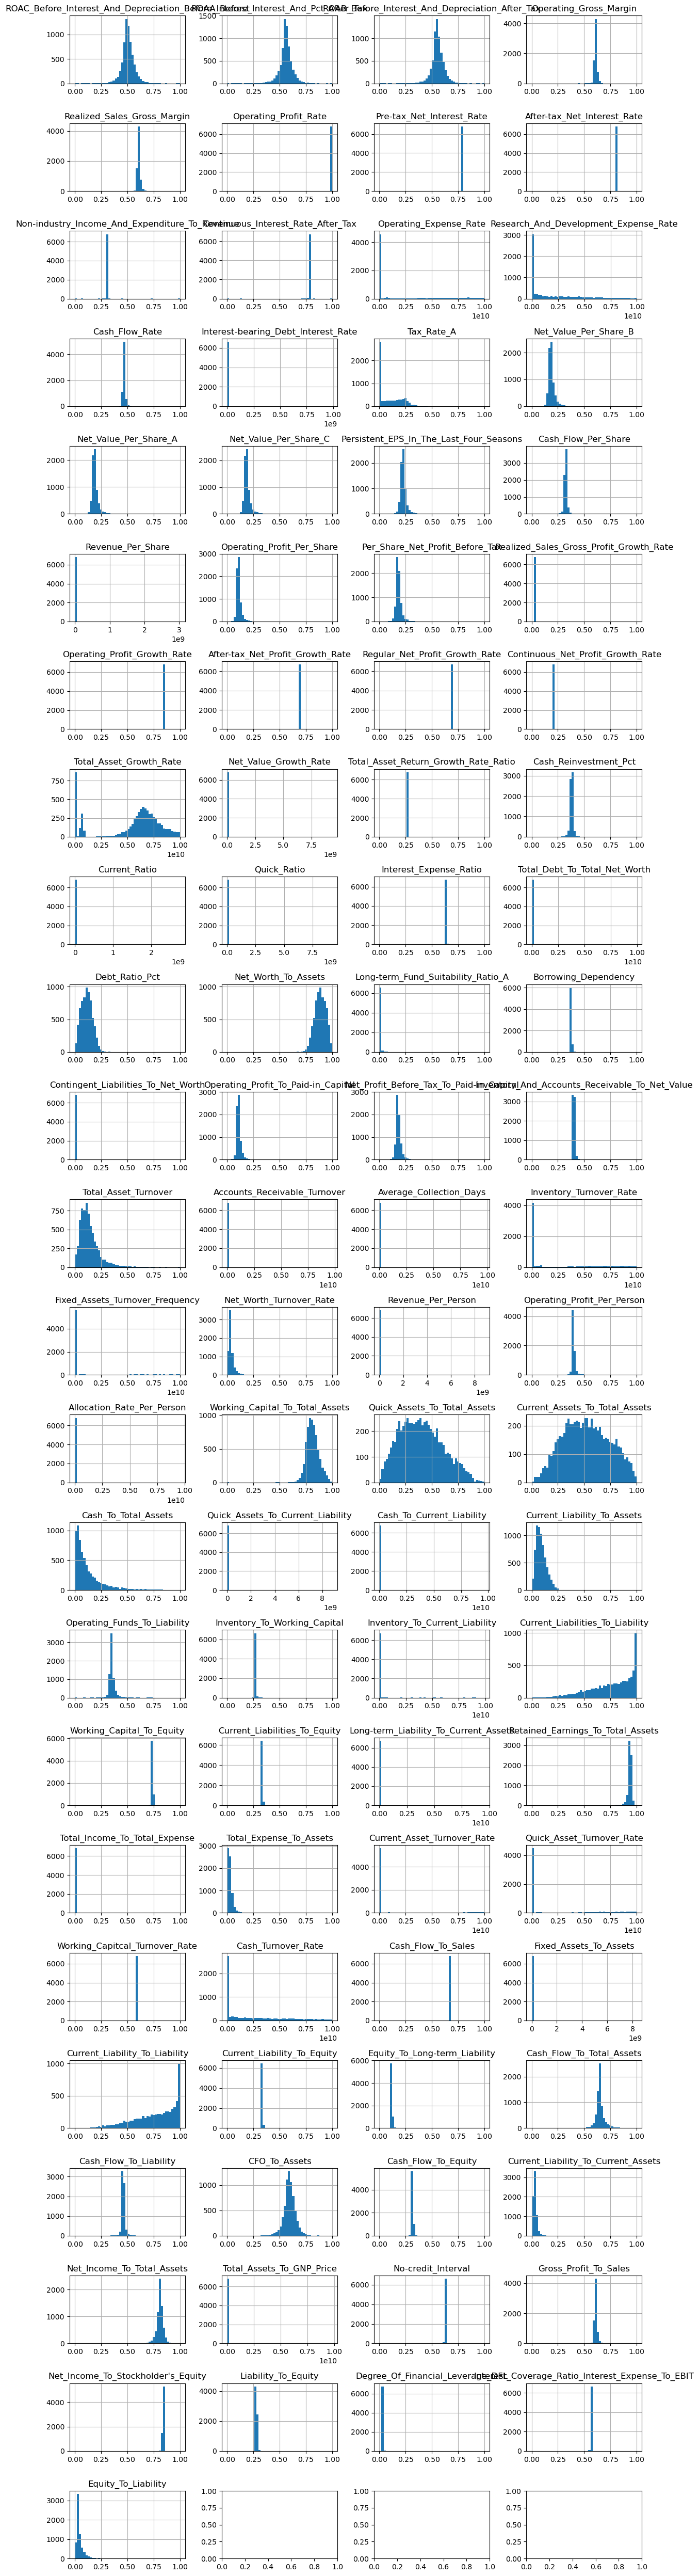

In [21]:
# Create the figure and axes
fig, axes = plt.subplots(nrows=24, ncols=4, figsize=(12, 50))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each variable's histogram
for i, col in enumerate(numeric_df.columns):
    numeric_df[col].hist(ax=axes[i], bins=50)
    axes[i].set_title(col)

# Adjust layout
plt.tight_layout()

plt.show()


When examining the histograms of features, it appears that many features are concentrated in specific ranges of the data. This indicates the presence of outliers that deviate significantly from the typical distribution. Let's check the distributions after deleting outliers.

While checking for outliers could be done during the EDA stage, there are various benefits to doing it during data wrangling. These benefits include ensuring data quality and integrity before any analysis, preventing outliers from skewing the results of the analysis, and identifying potential issues early in the process which can save time and effort later on.

The following code is a function that repalces outliers with NaN.

In [22]:
def replace_outliers_with_na(data, multiplier=1.5):
    """
    Replaces outliers in each column with NaN using the IQR method.
    
    Parameters:
    - data: DataFrame containing the data
    
    Returns:
    - data_with_na: DataFrame with outliers replaced by NaN
    """
    data_with_na = data.copy()  # Create a copy of the data to avoid modifying the original
    
    # Iterate over each numerical column
    for col in data_with_na.select_dtypes(include=[np.number]).columns:
        Q1 = data_with_na[col].quantile(0.25)
        Q3 = data_with_na[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Identify outliers
        outliers = (data_with_na[col] < Q1 - 1.5 * IQR) | (data_with_na[col] > Q3 + multiplier * IQR)
        
        # Replace outliers with NaN
        data_with_na.loc[outliers, col] = np.nan
    
    return data_with_na

To minimize information loss, we will set the multiplier for the IQR to 3.

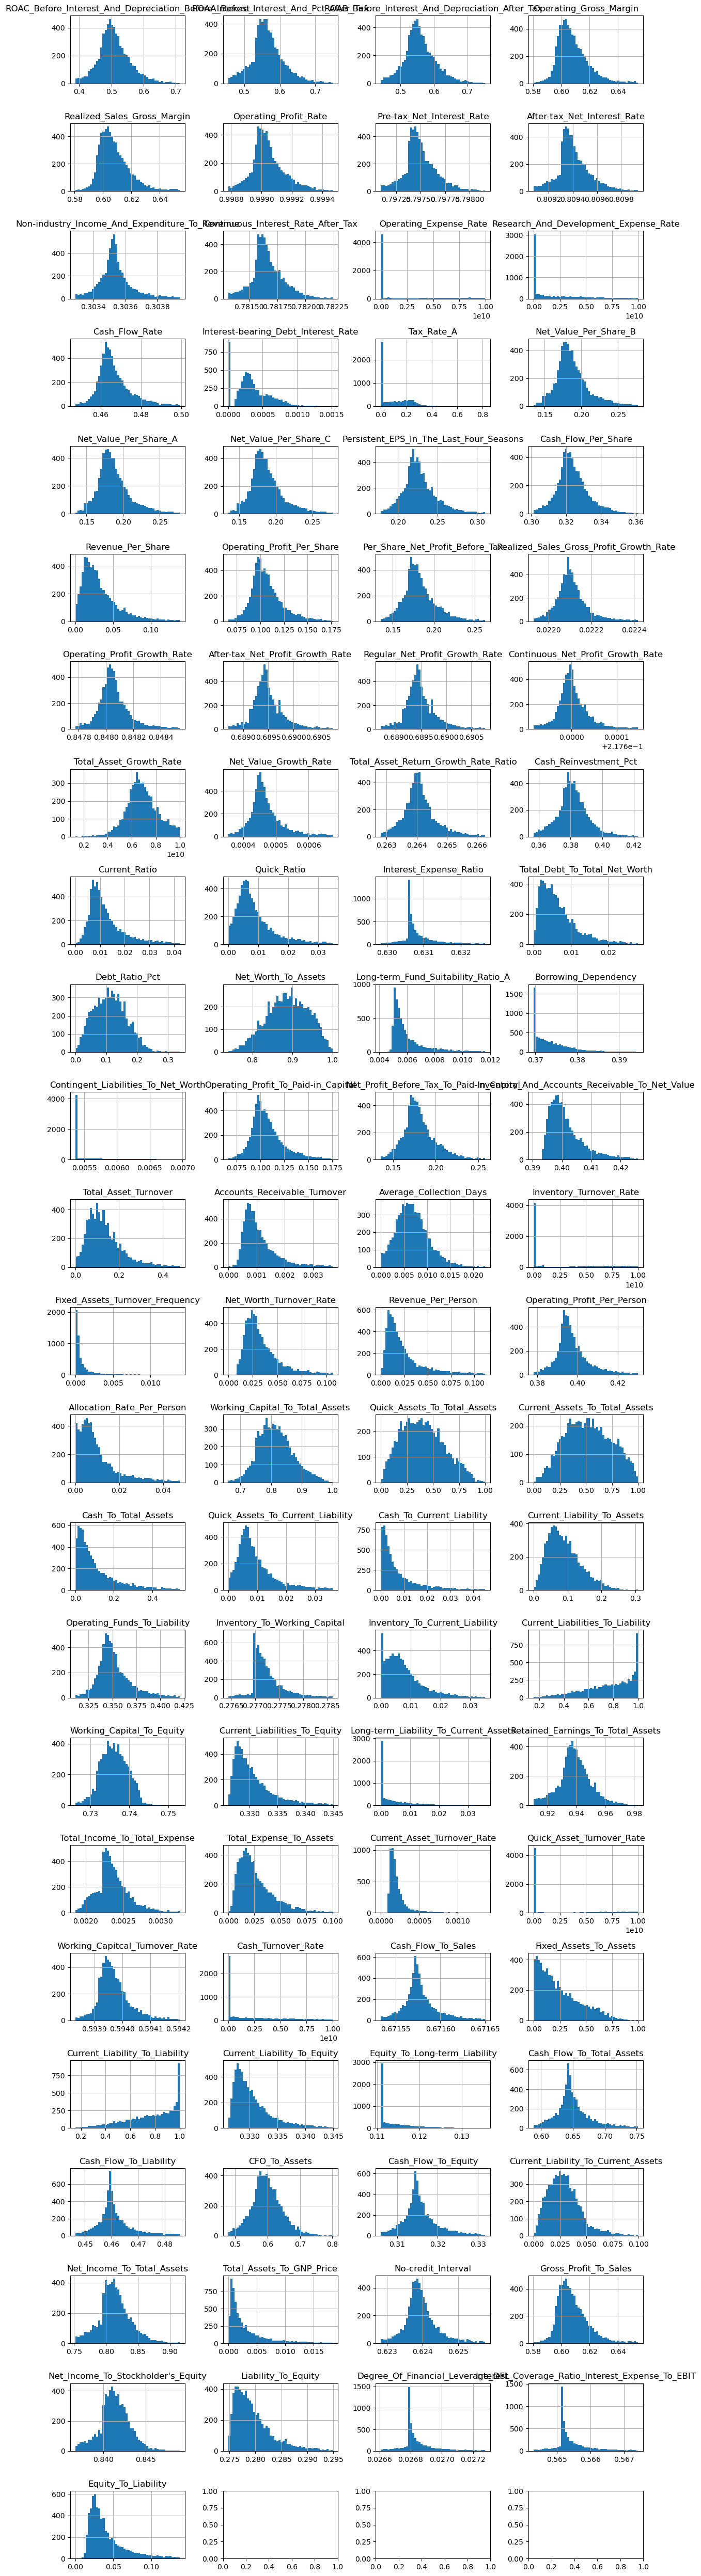

In [23]:
numeric_df_nonoutlier = replace_outliers_with_na(numeric_df, multiplier=3)

# Create the figure and axes
fig, axes = plt.subplots(nrows=24, ncols=4, figsize=(12, 50))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each variable's histogram
for i, col in enumerate(numeric_df_nonoutlier.columns):
    numeric_df_nonoutlier[col].hist(ax=axes[i], bins=50)
    axes[i].set_title(col)

# Adjust layout
plt.tight_layout()

plt.show()

Replacing the outliers to NaN from each feature, the distributions seem to be much better for analysis.

Let's check the proportion of outliers of each feature.

Number of rows with at least one missing value: 5787


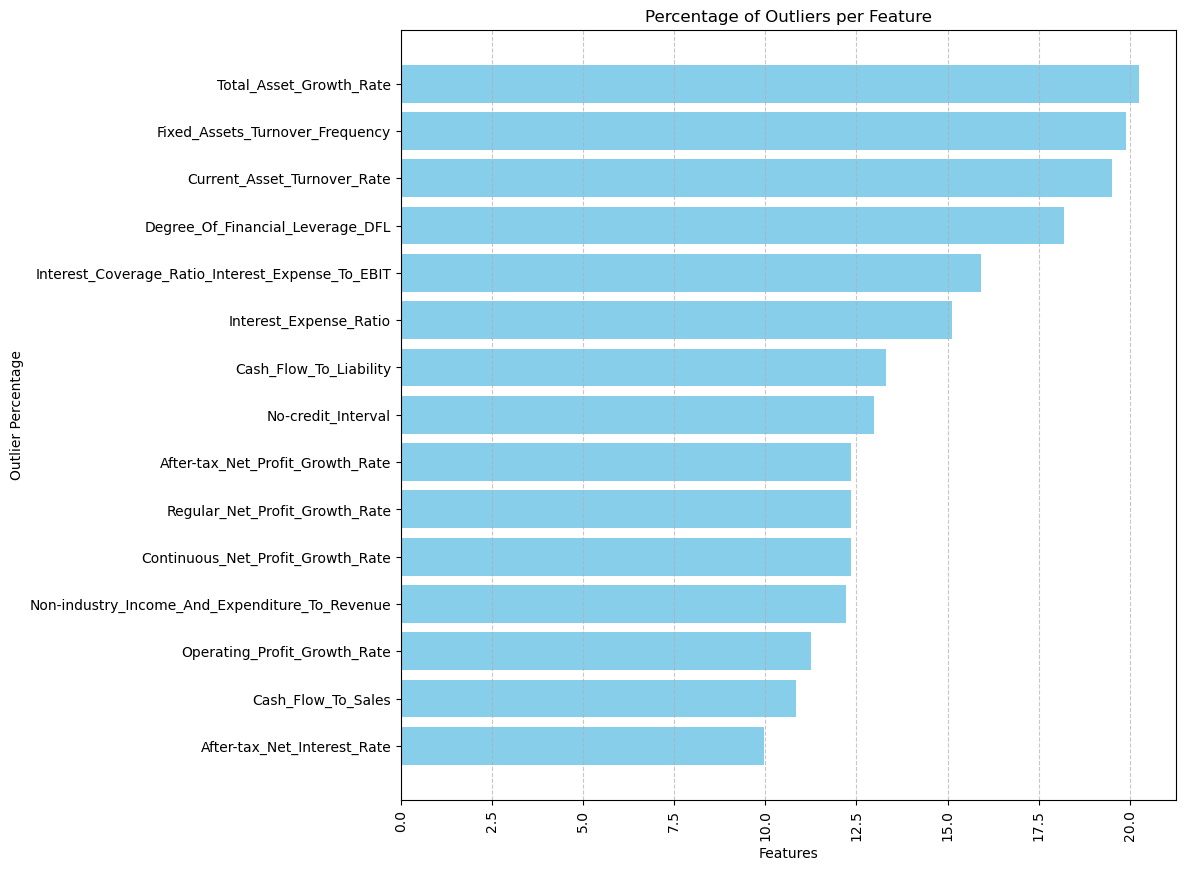

In [24]:
# Calculate missing value percentage per column
missing_percentage_per_column = (numeric_df_nonoutlier.isnull().sum() / len(numeric_df_nonoutlier)) * 100

# Sort the missing percentage values in ascending order
missing_percentage_per_column_sorted = missing_percentage_per_column.sort_values().tail(15)

# Plot the bar plot
plt.figure(figsize=(10, 10))
plt.barh(missing_percentage_per_column_sorted.index, missing_percentage_per_column_sorted.values, color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Outlier Percentage')
plt.title('Percentage of Outliers per Feature')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Count the number of rows with at least one missing value
rows_with_missing_values = numeric_df_nonoutlier.isnull().any(axis=1).sum()
print("Number of rows with at least one missing value:", rows_with_missing_values)

# 2. Exploratory Data Analysis<a id='2_EDA'></a>

## Data Imports

## 2.1 Univariate Analysis <a id='2.1_Univariate_Analysis'></a>

In the data wrangling section, we learned that some of the numerical features contain numerous outliers and have a skewed distribution. This can be a potential problem when we build models. In such cases, we can consider transforming the data using methods like log transformation and other outlier detection methods, such as Z-scoring, as remedies to these problems.

### 2.1.1 Log Transformation on Numeric Features <a id='2.1.1_Log_Transformation_on_Numeric_Features'></a>
<br>
Since the minimum value of most features is 0, you can try adding a small constant to all values before applying a log transformation. For example, applying log(x + 1) when the minimum value is 0 can help avoid issues with negative values.

In [25]:
# fn for log transformation
def log_transform(data):
    log_data = data.copy()
    # selecting numeric features
    numeric_features = data.select_dtypes(include=[np.number])
    
    # log transformation
    log_transformed = numeric_features.map(lambda x: np.log(x + 1) if x >= 0 else np.nan)
    
    # putting transformed data into original df
    log_data[numeric_features.columns] = log_transformed
    
    return log_data

df_log = log_transform(df)
df_log.head()

Bankrupt  ROAC_Before_Interest_And_Depreciation_Before_Interest  \
0        1                                           0.315244       
1        1                                           0.381371       
2        1                                           0.354923       
3        1                                           0.336361       
4        1                                           0.381870       

   ROAA_Before_Interest_And_Pct_After_Tax  \
0                                0.353743   
1                                0.430622   
2                                0.404811   
3                                0.372435   
4                                0.430764   

   ROAB_Before_Interest_And_Depreciation_After_Tax  Operating_Gross_Margin  \
0                                         0.340571                0.470914   
1                                         0.416557                0.476380   
2                                         0.386822                0.470909   
3                                         0.376883                0.459664   
4                                         0.420221                0.469243   

   Realized_Sales_Gross_Margin  Operating_Profit_Rate  \
0                     0.470914               0.692632   
1                     0.476380               0.692620   
2                     0.470855               0.692576   
3                     0.459664               0.692497   
4                     0.469243               0.692634   

   Pre-tax_Net_Interest_Rate  After-tax_Net_Interest_Rate  \
0                   0.586056                     0.592669   
1                   0.586330                     0.592940   
2                   0.585787                     0.592436   
3                   0.586100                     0.592755   
4                   0.586322                     0.592942   

   Non-industry_Income_And_Expenditure_To_Revenue  ...  Liability-Assets_Flag  \
0                                        0.264398  ...                      0   
1                                        0.265096  ...                      0   
2                                        0.263929  ...                      0   
3                                        0.264938  ...                      0   
4                                        0.265034  ...                      0   

   Net_Income_To_Total_Assets  Total_Assets_To_GNP_Price  No-credit_Interval  \
0                    0.540489                   0.009177            0.484202   
1                    0.585171                   0.008289            0.484678   
2                    0.573614                   0.039223            0.484794   
3                    0.553629                   0.003247            0.484232   
4                    0.585014                   0.003870            0.484597   

   Gross_Profit_To_Sales  Net_Income_To_Stockholder's_Equity  \
0               0.470912                            0.603162   
1               0.476381                            0.609749   
2               0.470909                            0.608011   
3               0.459661                            0.606879   
4               0.469242                            0.609751   

   Liability_To_Equity  Degree_Of_Financial_Leverage_DFL  \
0             0.254799                          0.026253   
1             0.249860                          0.234738   
2             0.254788                          0.026208   
3             0.248204                          0.026346   
4             0.245698                          0.024450   

   Interest_Coverage_Ratio_Interest_Expense_To_EBIT  Equity_To_Liability  
0                                          0.447279             0.016335  
1                                          0.451187             0.020581  
2                                          0.447059             0.016340  
3                                          0.447671             0.023699  
4                                          0.454

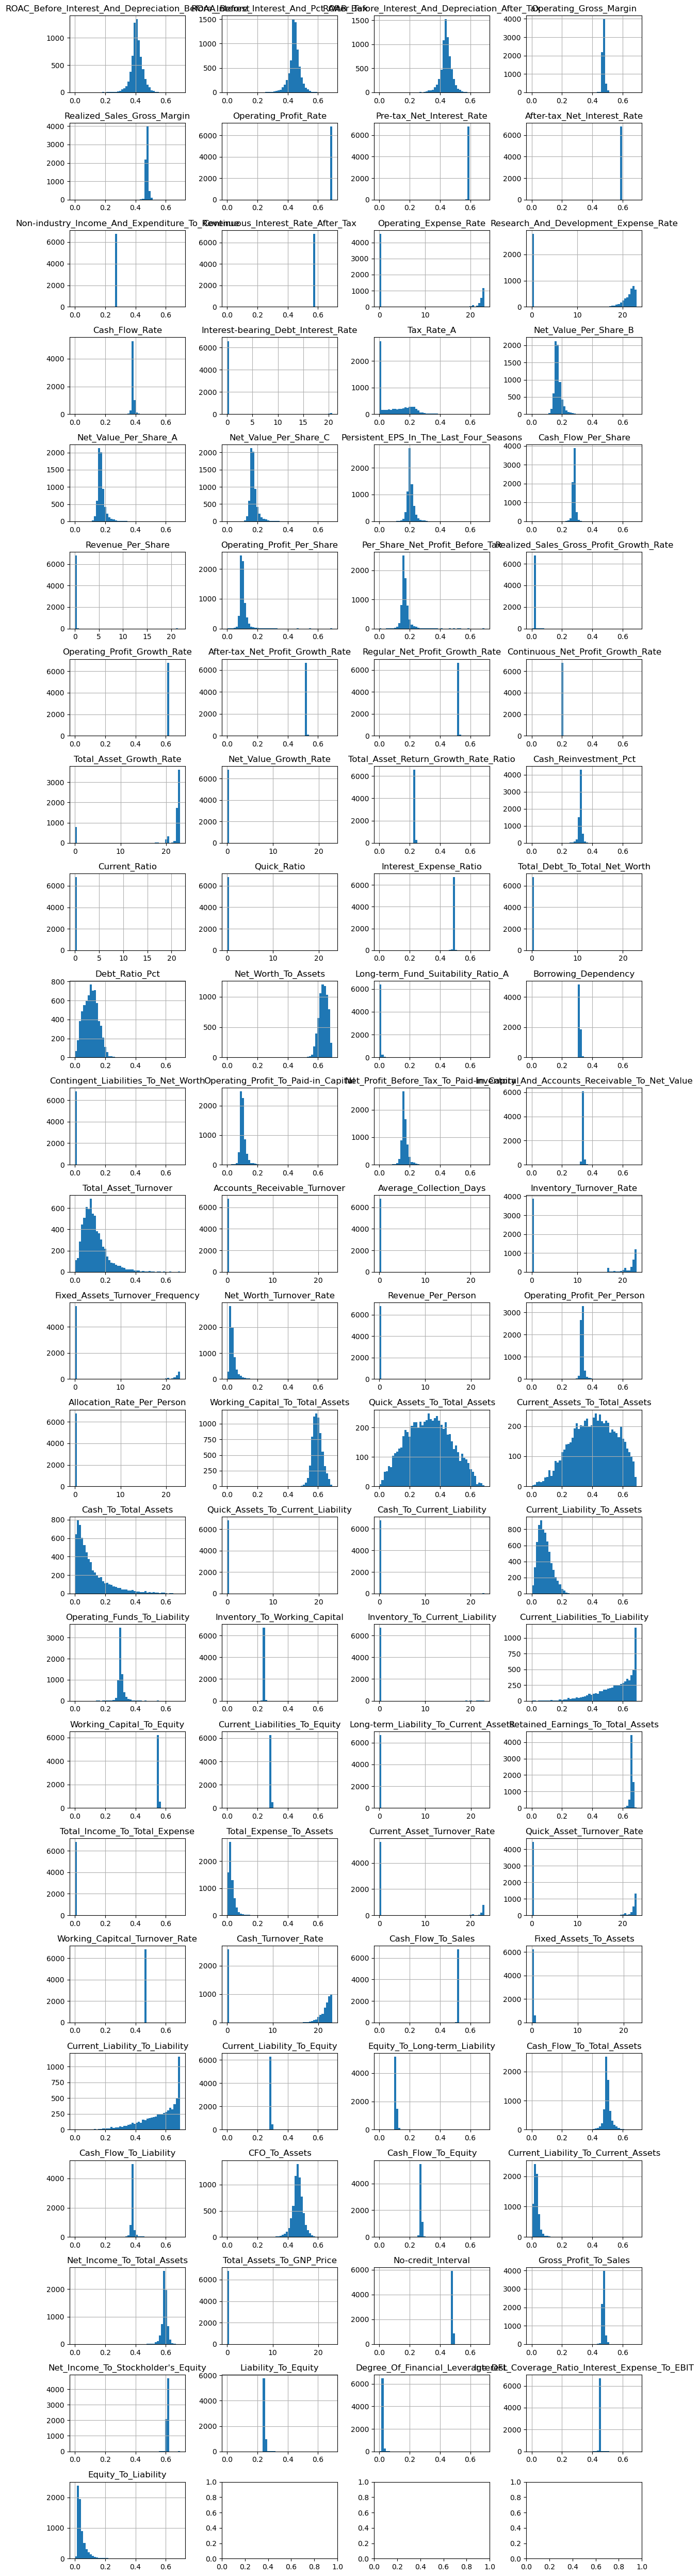

In [26]:
df_log_numeric = df_log.select_dtypes(include=[np.number])

# Create the figure and axes
fig, axes = plt.subplots(nrows=24, ncols=4, figsize=(12, 50))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each variable's histogram
for i, col in enumerate(df_log_numeric.columns):
    df_log_numeric[col].hist(ax=axes[i], bins=50)
    axes[i].set_title(col)

# Adjust layout
plt.tight_layout()

plt.show()


The distributions of the features do not appear to be significantly improved compared to raw data. Therefore, we have decided not to apply the log transformation.

### 2.1.2 Detecting Outliers using Z-Scoring <a id='2.1.1_Log_Transformation_on_Numeric_Features'></a>
<br>

As observed in the data wrangling section, using the interquartile range with a multiplier of 3 results in too many data points being identified as outliers. Therefore, we will use an alternative method, Z-scoring, in this case.

In [27]:
# fn to replace outliers with NA using Z-Scoring

def replace_outliers_with_na(data, threshold=2):
    # Numeric features only
    numeric_cols = data.select_dtypes(include=[np.number]).columns

    # Apply Z-scoring
    z_scores = data[numeric_cols].apply(zscore)

    # Replace values with NA where abs(z-score) > threshold
    data[numeric_cols] = data[numeric_cols].mask(z_scores.abs() > threshold, np.nan)

    return data

In [28]:
df_nonoutlier = replace_outliers_with_na(df, threshold=3)
df_nonoutlier.head()

Bankrupt  ROAC_Before_Interest_And_Depreciation_Before_Interest  \
0        1                                           0.370594       
1        1                                           0.464291       
2        1                                           0.426071       
3        1                                           0.399844       
4        1                                           0.465022       

   ROAA_Before_Interest_And_Pct_After_Tax  \
0                                0.424389   
1                                0.538214   
2                                0.499019   
3                                0.451265   
4                                0.538432   

   ROAB_Before_Interest_And_Depreciation_After_Tax  Operating_Gross_Margin  \
0                                         0.405750                0.601457   
1                                         0.516730                0.610235   
2                                         0.472295                0.601450   
3                                         0.457733                0.583541   
4                                         0.522298                0.598783   

   Realized_Sales_Gross_Margin  Operating_Profit_Rate  \
0                     0.601457               0.998969   
1                     0.610235               0.998946   
2                     0.601364               0.998857   
3                     0.583541               0.998700   
4                     0.598783               0.998973   

   Pre-tax_Net_Interest_Rate  After-tax_Net_Interest_Rate  \
0                   0.796887                     0.808809   
1                   0.797380                     0.809301   
2                   0.796403                     0.808388   
3                   0.796967                     0.808966   
4                   0.797366                     0.809304   

   Non-industry_Income_And_Expenditure_To_Revenue  ...  Liability-Assets_Flag  \
0                                        0.302646  ...                      0   
1                                        0.303556  ...                      0   
2                                        0.302035  ...                      0   
3                                        0.303350  ...                      0   
4                                        0.303475  ...                      0   

   Net_Income_To_Total_Assets  Total_Assets_To_GNP_Price  No-credit_Interval  \
0                    0.716845                   0.009219            0.622879   
1                    0.795297                   0.008323            0.623652   
2                    0.774670                   0.040003            0.623841   
3                    0.739555                   0.003252            0.622929   
4                    0.795016                   0.003878            0.623521   

   Gross_Profit_To_Sales  Net_Income_To_Stockholder's_Equity  \
0               0.601453                            0.827890   
1               0.610237                            0.839969   
2               0.601449                            0.836774   
3               0.583538                            0.834697   
4               0.598782                            0.839973   

   Liability_To_Equity  Degree_Of_Financial_Leverage_DFL  \
0             0.290202                          0.026601   
1             0.283846                               NaN   
2             0.290189                          0.026555   
3             0.281721                          0.026697   
4             0.278514                          0.024752   

   Interest_Coverage_Ratio_Interest_Expense_To_EBIT  Equity_To_Liability  
0                                          0.564050             0.016469  
1                                          0.570175             0.020794  
2                                          0.563706             0.016474  
3                                          0.564663             0.023982  
4                                          0.575

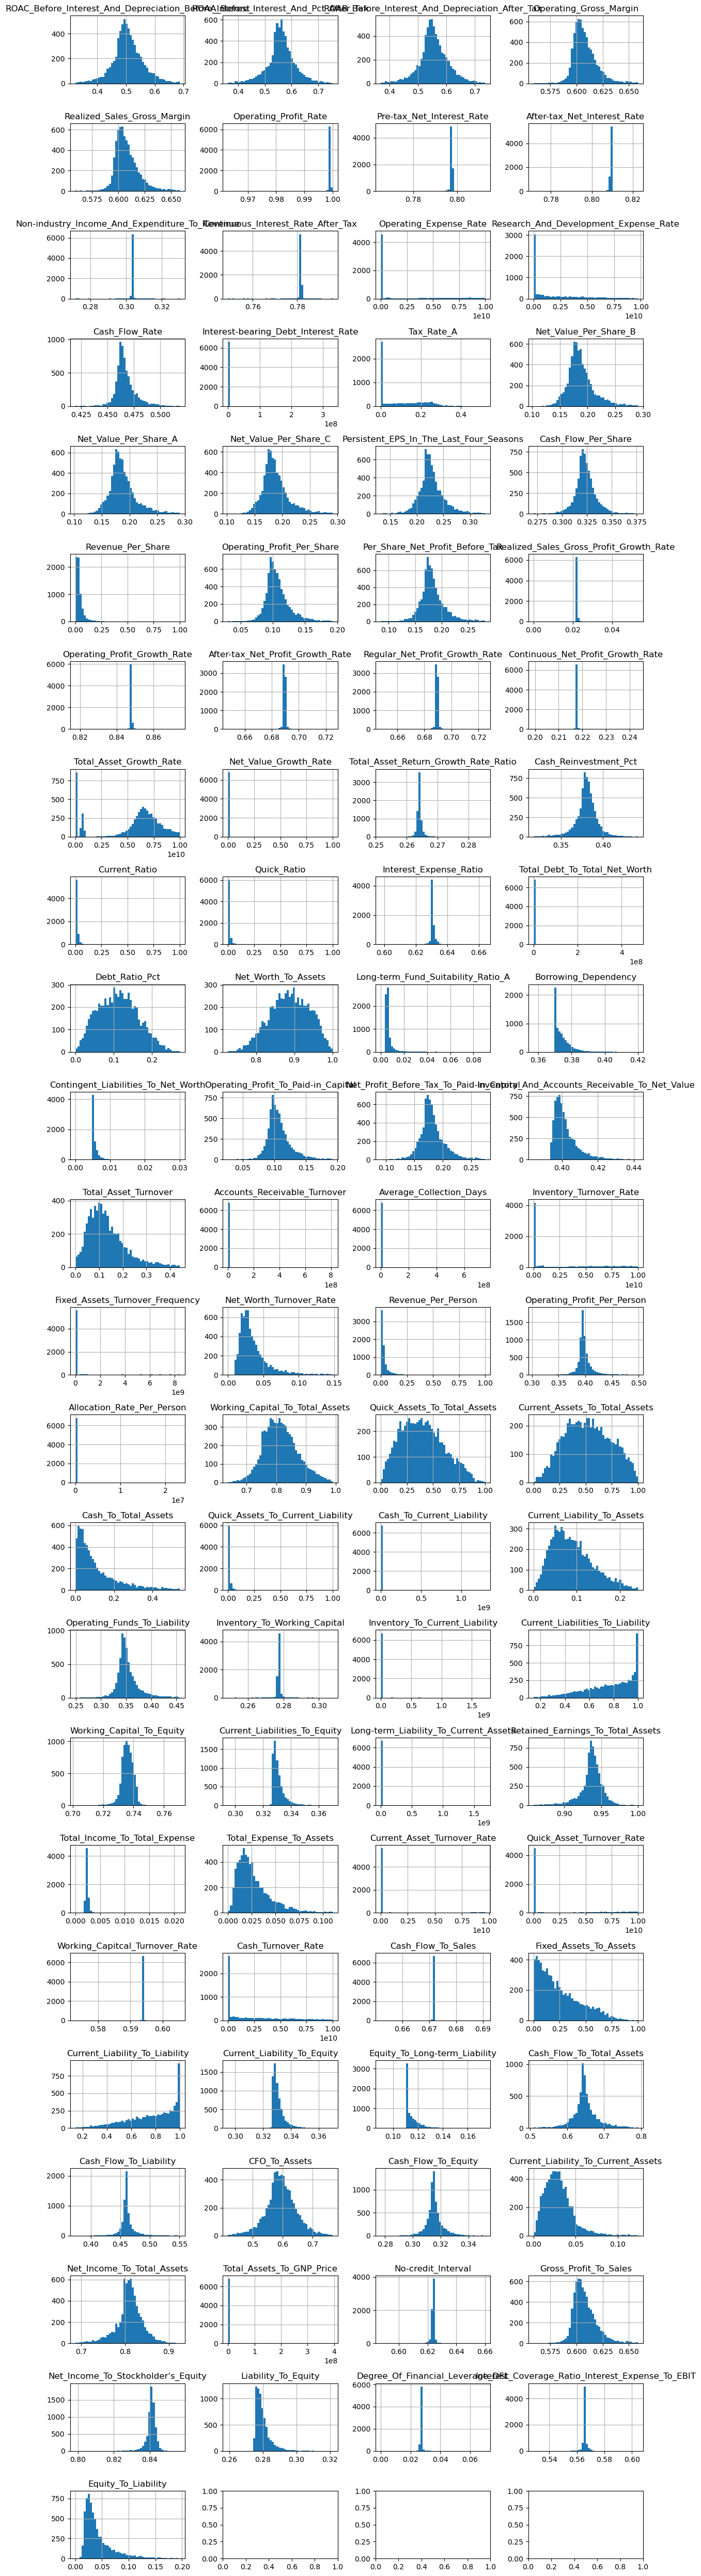

In [29]:
#___________ Check out the distribution of Features without outliers

# numeric df without outliers
df_numeric_nonoutlier = df_nonoutlier.select_dtypes(include=[np.number])

# Create the figure and axes
fig, axes = plt.subplots(nrows=24, ncols=4, figsize=(12, 50))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each variable's histogram
for i, col in enumerate(df_numeric_nonoutlier.columns):
    df_numeric_nonoutlier[col].hist(ax=axes[i], bins=50)
    axes[i].set_title(col)

# Adjust layout
plt.tight_layout()

plt.show()


After removing outliers, there was an improvement in the distributions of the features. Now, let's examine the proportion of values identified as outliers for each feature.

Number of rows with at least one missing value: 1910


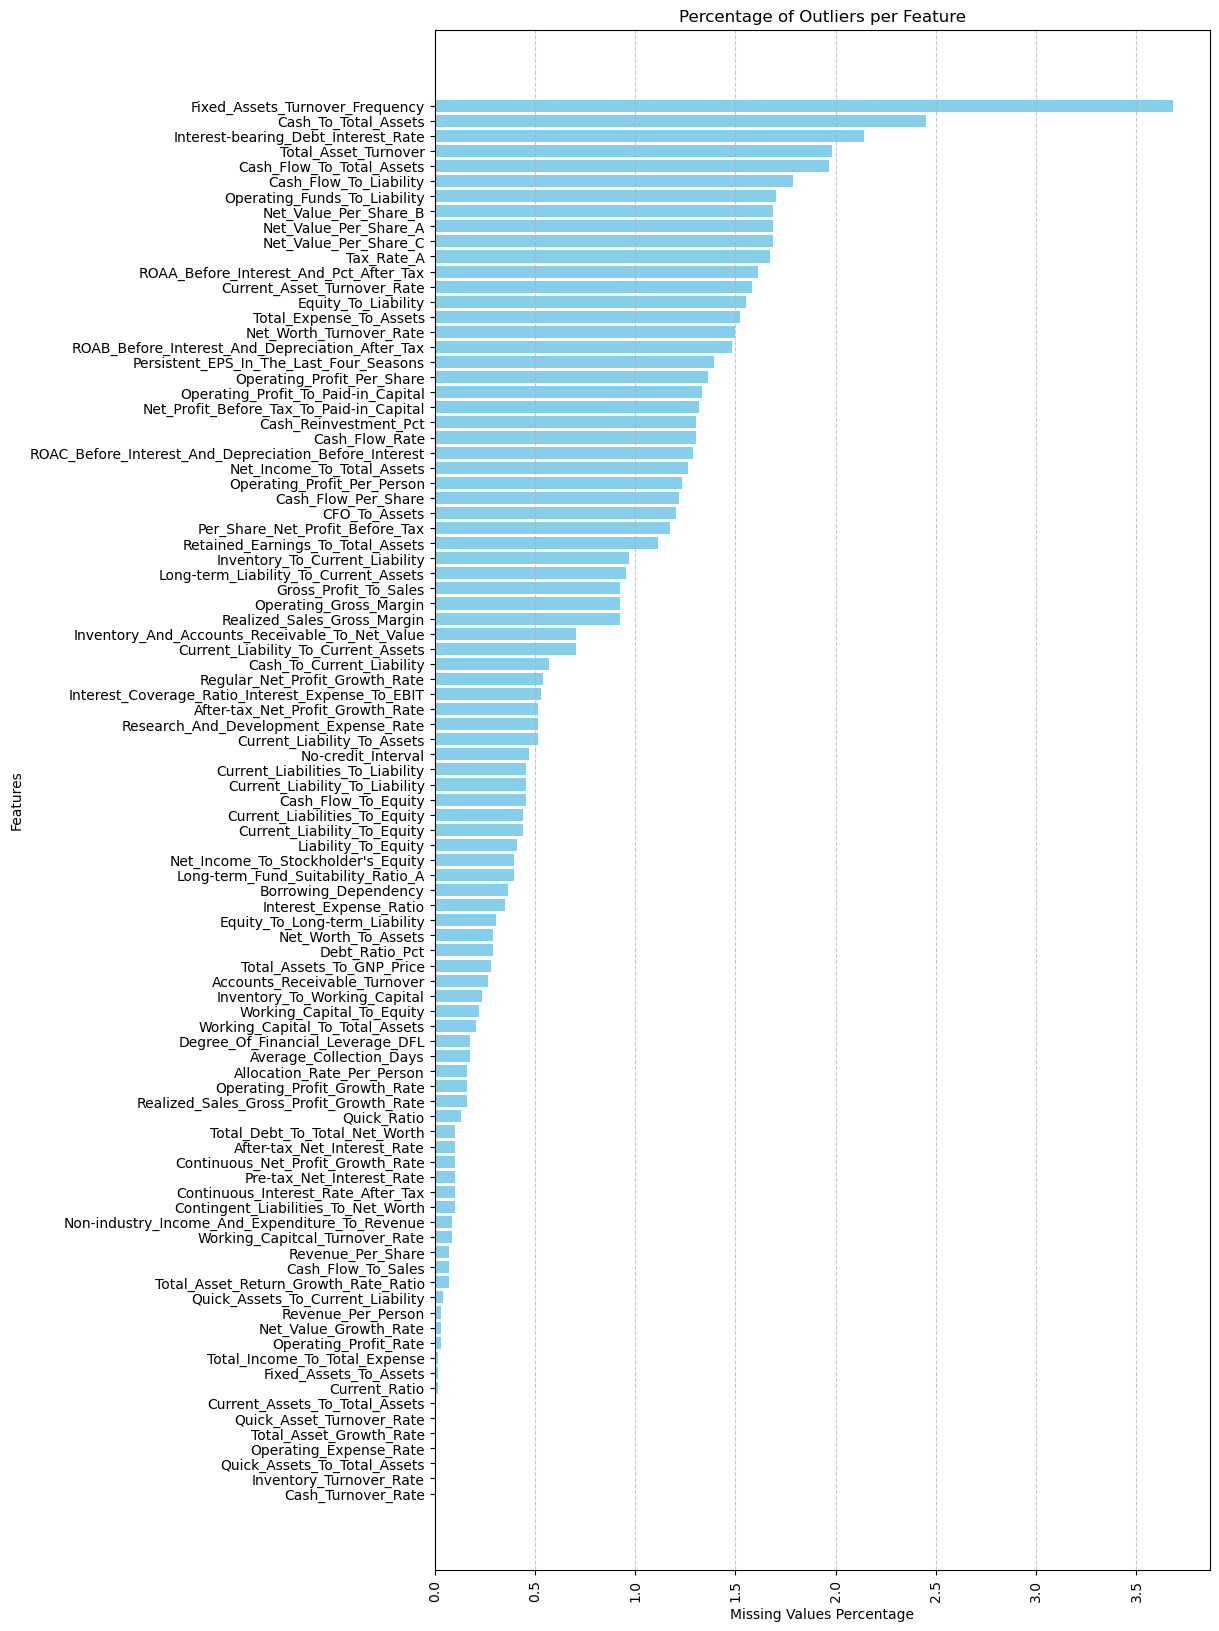

In [30]:
# Calculate missing value percentage per column
missing_percentage_per_column = (df_numeric_nonoutlier.isnull().sum() / len(df_numeric_nonoutlier)) * 100

# Sort the missing percentage values in ascending order
missing_percentage_per_column_sorted = missing_percentage_per_column.sort_values()

# Plot the bar plot
plt.figure(figsize=(10, 20))
plt.barh(missing_percentage_per_column_sorted.index, missing_percentage_per_column_sorted.values, color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Missing Values Percentage')
plt.ylabel('Features')
plt.title('Percentage of Outliers per Feature')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Count the number of rows with at least one missing value
rows_with_missing_values = df_numeric_nonoutlier.isnull().any(axis=1).sum()
print("Number of rows with at least one missing value:", rows_with_missing_values)

Using Z-scoring with a threshold level of 3.0 to replace outliers with NA results in all data having less than 3% missing values, as observed in the bar chart above. This indicates that replacing outliers with missing values yields a sufficiently low proportion for imputation.

### 2.1.3. Another Perspective on Outliers <a id='2.1.3_Another_Perspective_on_Outliers'></a>
<br>

Even if the proportion of outliers is low enough to consider replacing them with other values, it's important to think about whether outliers should be replaced. Sometimes, outliers may contain crucial information for predicting the target variable.

We are currently modeling an extreme event, namely corporate bankruptcy. Bankruptcy is more likely to occur when a company's financial ratios are extreme or considered outliers. Therefore, in the following section, I will examine the correlation between the features and the target variable, as well as the relationship between the outliers in the features and the target variable.

## 2.2 Bivariate Analysis

### 2.2.1 Relationship between the Features

First, let's examine the correlation between the features using heatmap.

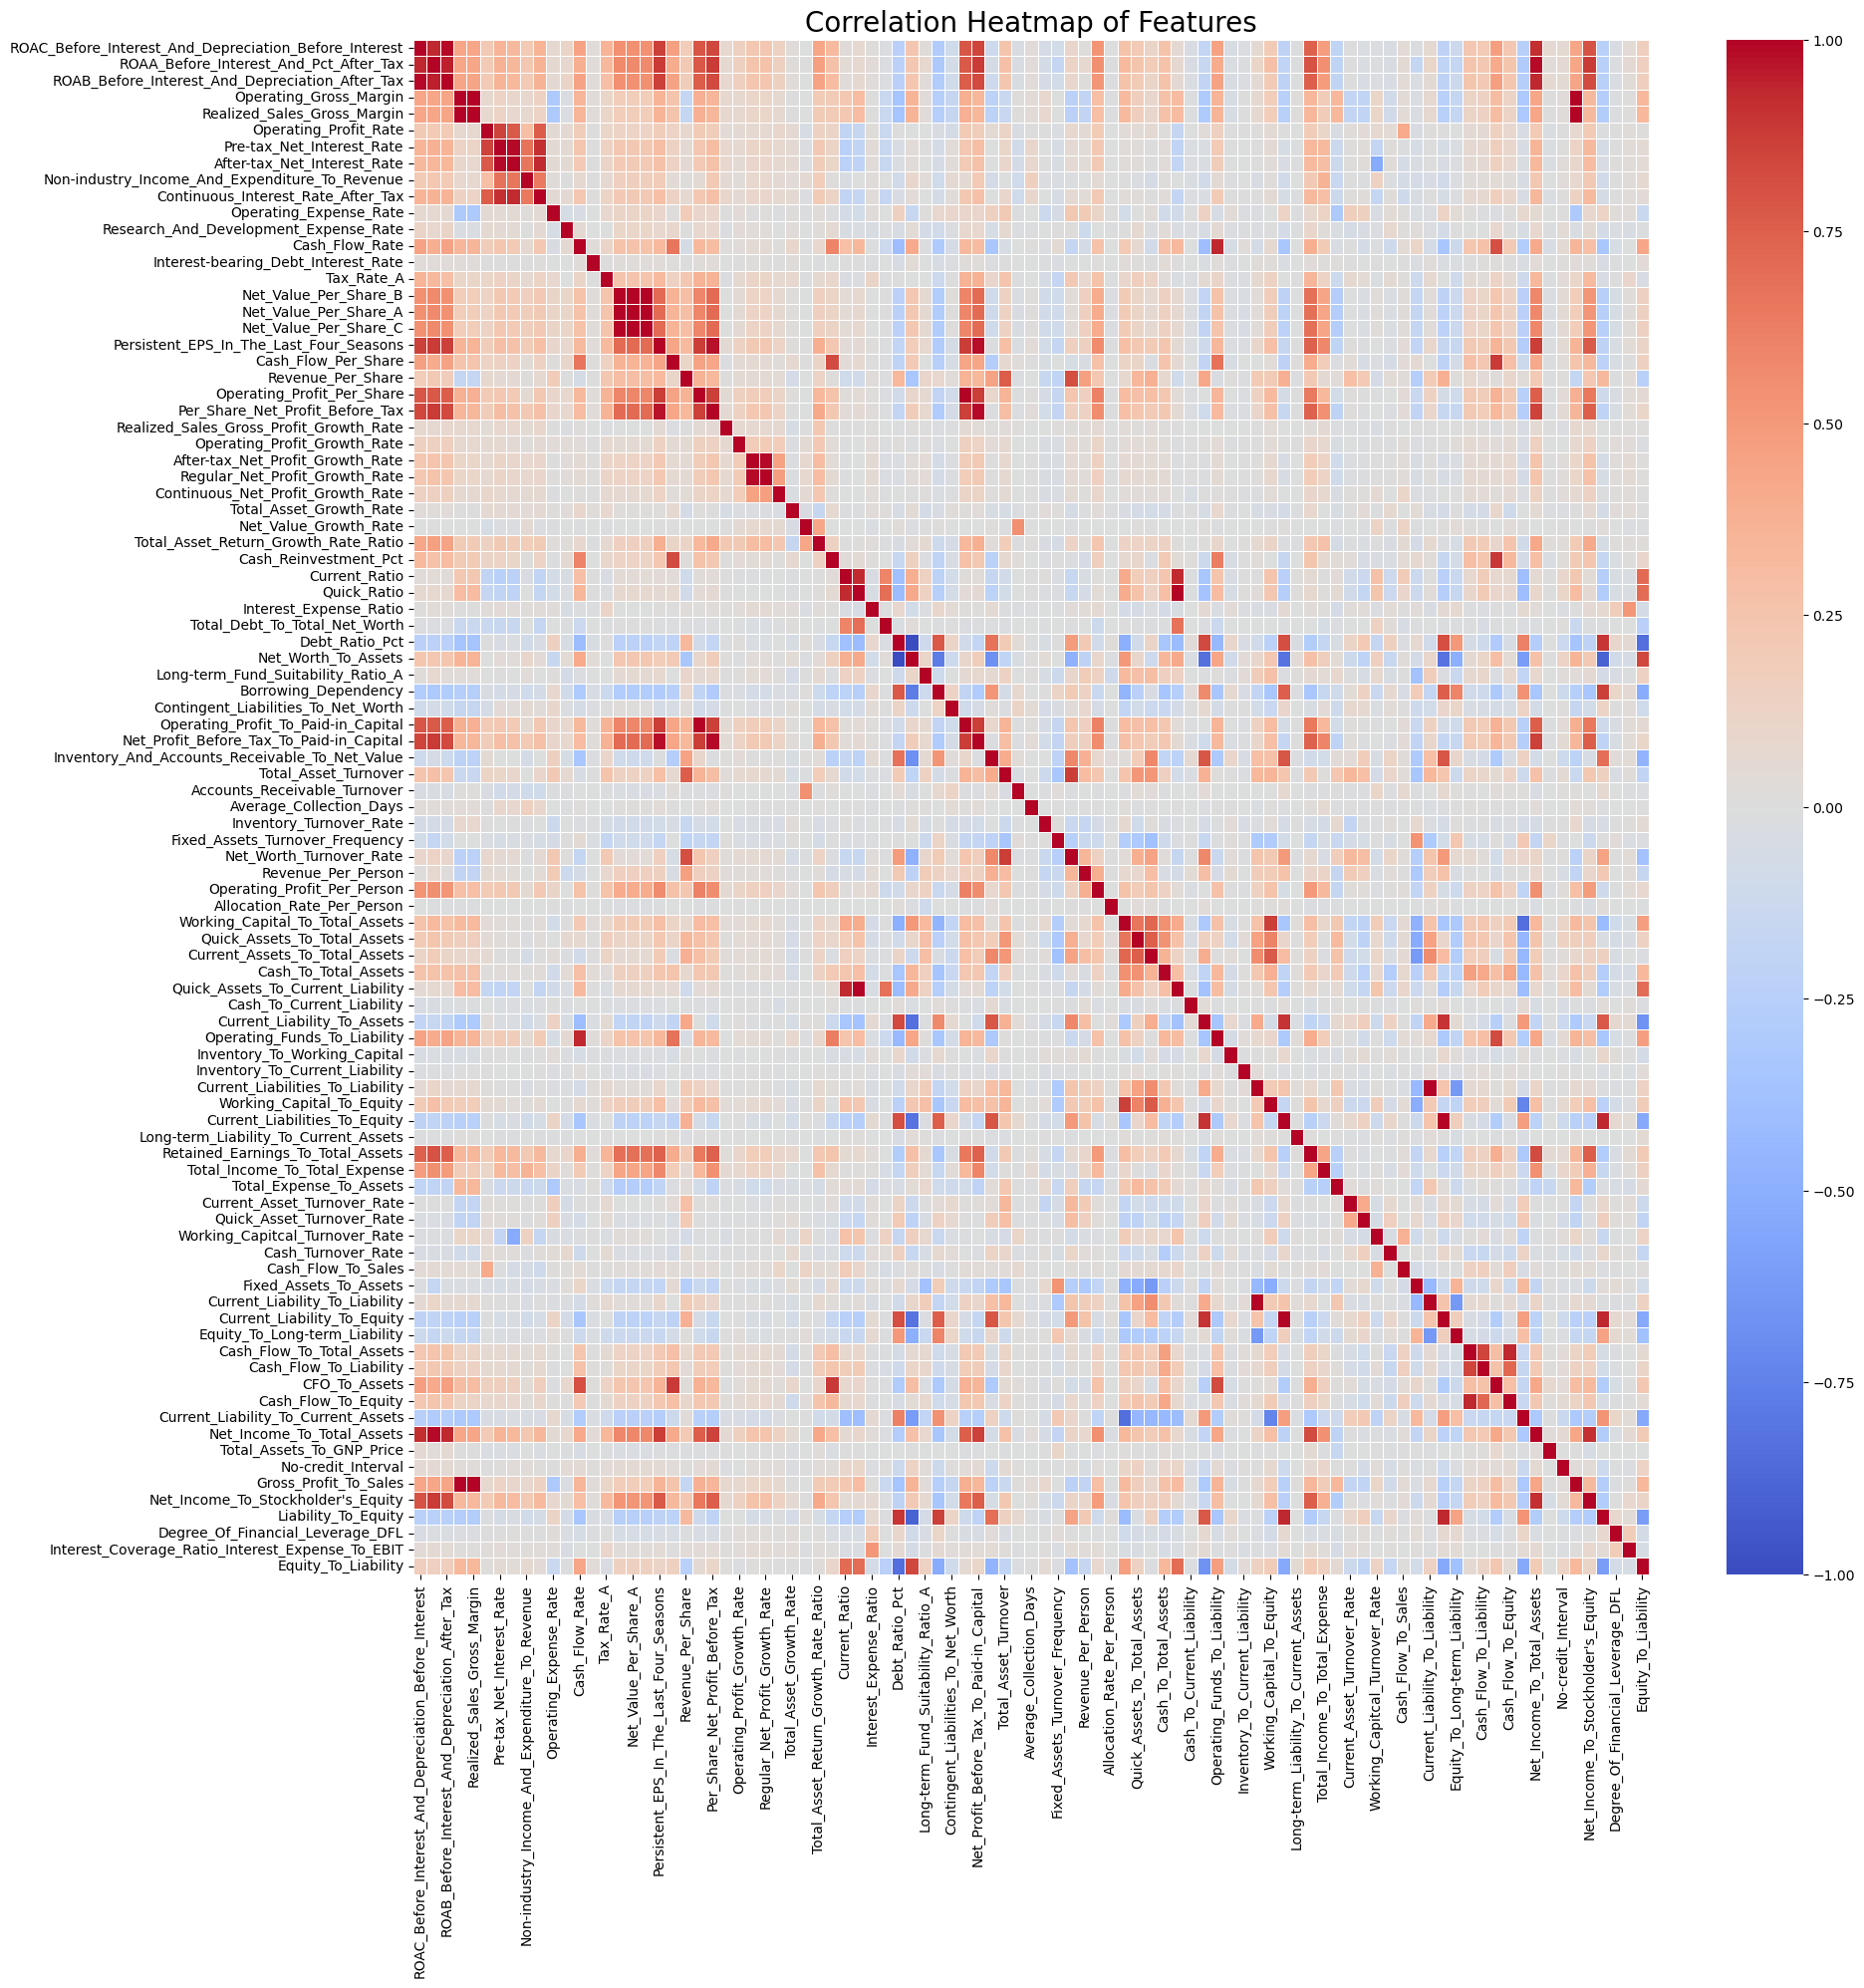

In [31]:
df_numeric = df.select_dtypes(include=[np.number])

correlation_matrix = df_numeric.corr()

# Set up the matplotlib figure
plt.figure(figsize=(20, 20))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)

# Add title
plt.title('Correlation Heatmap of Features', fontsize=20)

# Show the plot
plt.show()

The provided heatmap, representing a 93x93 matrix with thousands of values, visualizes the correlation coefficients between 93 features. While it's challenging to pinpoint the exact correlation values for specific pairs, it's evident that many pairs exhibit high absolute correlation coefficients. To figure out the number of pairs with correlation coefficients exceeding a certain threshold, I built the following function.

In [32]:
def high_corr_pairs(correlation_matrix, threshold=0.7):

    pairs = []
    correlations = []
    cols = correlation_matrix.columns
    
    for i in range(len(cols)):
        for j in range(i + 1, len(cols)):
            corr_value = correlation_matrix.iloc[i, j]
            if abs(corr_value) >= threshold:
                pairs.append((cols[i], cols[j]))
                correlations.append(corr_value)
    
    result_df = pd.DataFrame({
        'pairs': pairs,
        'correlation': correlations
    })
    
    result_df = result_df.sort_values(by='correlation', ascending=False).reset_index(drop=True)
    
    return result_df

In [33]:
high_corr_list = high_corr_pairs(correlation_matrix, threshold=0.7)
high_corr_list

pairs  correlation
0    (Current_Liabilities_To_Equity, Current_Liabil...     1.000000
1    (Current_Liabilities_To_Liability, Current_Lia...     1.000000
2      (Operating_Gross_Margin, Gross_Profit_To_Sales)     1.000000
3       (Net_Value_Per_Share_A, Net_Value_Per_Share_C)     0.999694
4       (Net_Value_Per_Share_B, Net_Value_Per_Share_A)     0.999488
..                                                 ...          ...
118  (Net_Worth_To_Assets, Current_Liability_To_Ass...    -0.831851
119              (Debt_Ratio_Pct, Equity_To_Liability)    -0.835971
120  (Working_Capital_To_Total_Assets, Current_Liab...    -0.842171
121         (Net_Worth_To_Assets, Liability_To_Equity)    -0.894590
122              (Debt_Ratio_Pct, Net_Worth_To_Assets)    -1.000000

[123 rows x 2 columns]

In the above table, we can find that 131 pairs of the features have correlation above 0.7 in absolute value. The reason for high absolute correlation values in the dataset is that these features are highly linearly related to each other. This often happens when features are derived from similar underlying metrics or when they represent the same concept in different ways. <br>

This suggests that there may be multicollinearity issues during subsequent modeling steps. Since there are many variables and multicollinearity issues, we may be able to solve this using Feature Selection or PCA. We will discuss this in the modeling section.

### 2.2.2 Relationship between the Features and Target Variables

#### 2.2.2.1 Target vs Numerical Features <br>


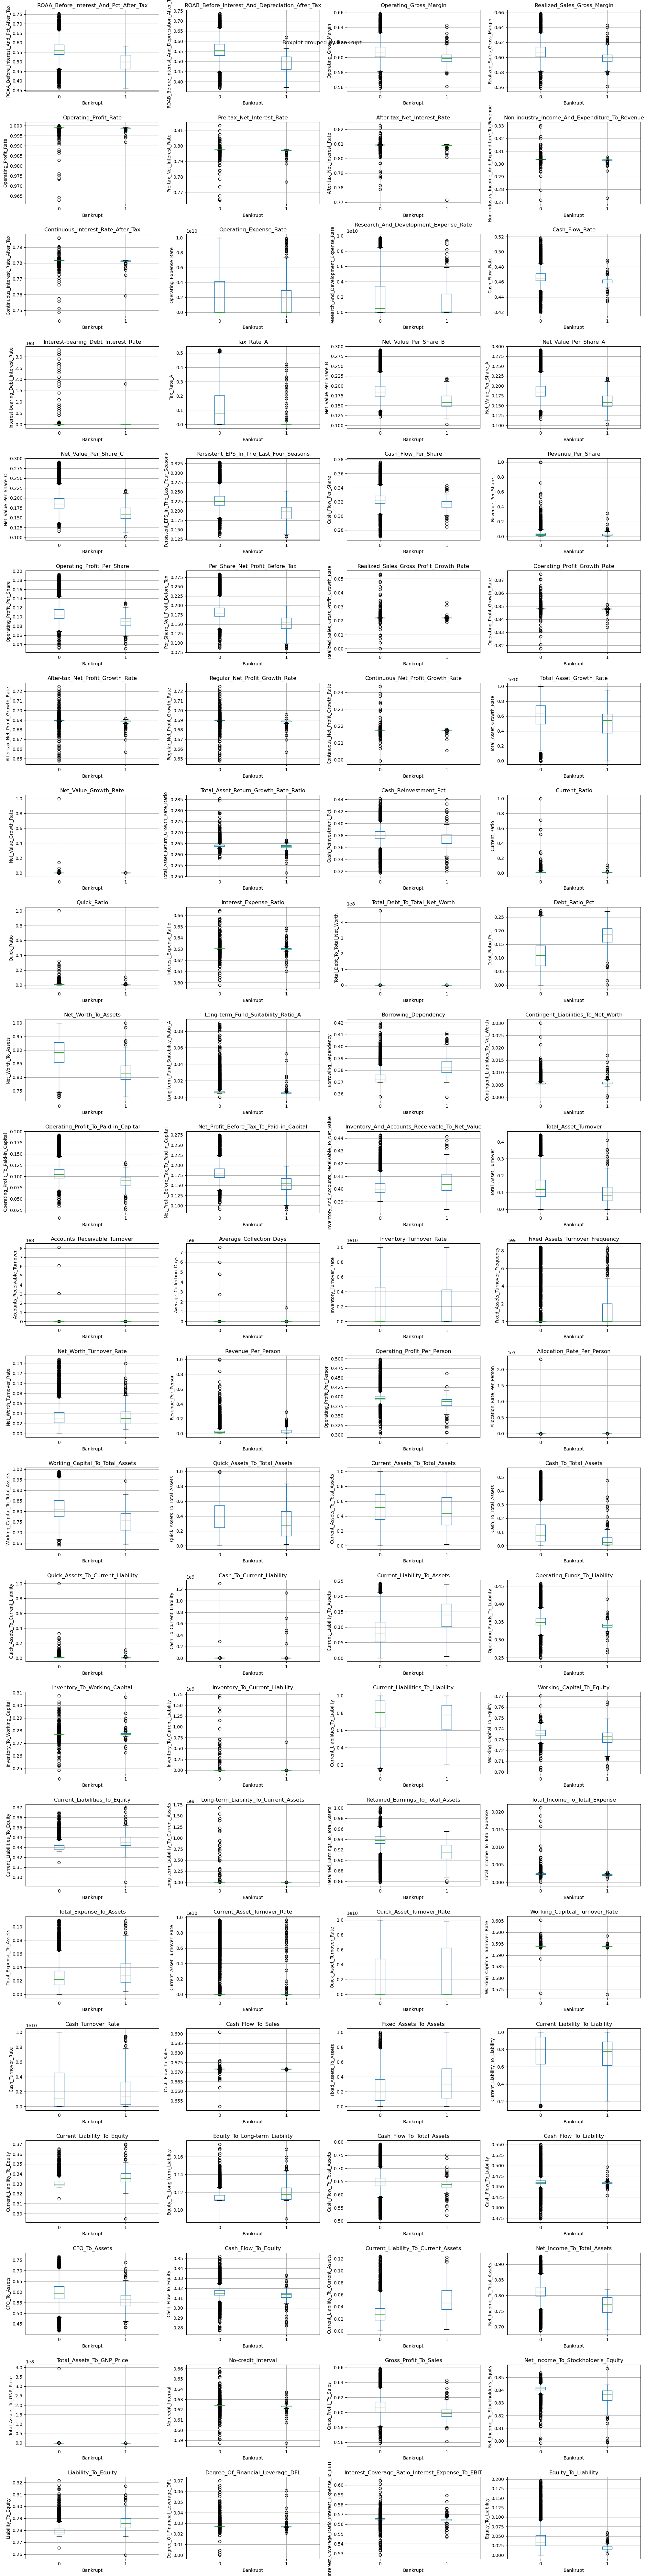

In [34]:
# retrieve the names of numerical features as list
target = 'Bankrupt'
numeric_features = df.select_dtypes(include=[np.number]).columns[1:]

# Create the figure and axes
fig, axs = plt.subplots(nrows=23, ncols=4, figsize=(20, 80))

for i, feature in enumerate(numeric_features):
    row = i // 4
    col = i % 4
    df_nonoutlier.boxplot(column=feature, by=target, ax=axs[row, col])
    axs[row, col].set_title(f'{feature}')
    axs[row, col].set_xlabel(target)
    axs[row, col].set_ylabel(feature)

plt.tight_layout()
plt.show()

If the distribution characteristics of a feature differ according to the target variable value, that feature can be considered useful for prediction. Looking at the box plots above, variables included in the three categories of profitability, profit, growth, and financial stability are likely to be useful for bankruptcy prediction. <br>

* Profitability: ROA related features, Operating Gross Margin, Sales Gross Margin, etc.
* Profit: EPS, Operating Profit, Net Profit, Cash Flow, etc.
* Growth: Operating Profit Growth, Net Profit Growth Rate, etc.
* Stability: Current Ratio, Quick Ratio, Debt Ratio, Net Worth to Asset, etc.

#### 2.2.2.2 Target vs Outliers <br>

When the target variable is an extreme event, outliers in numerical features can play an important role in prediction. In particular, these outliers can better reflect extreme situations, helping the prediction model to detect such events more effectively. 

Using the following code, we will divide each numerical feature into outlier and normal groups, then calculate the proportion of the target variable being 1 for each group, and visualize it using a bar chart.

In [35]:
def calculate_bankrupt_proportions(data, target_col='Bankrupt'):
    
    # Convert the target column to integer
    data[target_col] = data[target_col].astype(int)
    
    proportions = {}

    # Get all numeric columns excluding the target column
    numeric_cols = data.select_dtypes(include=[np.number]).columns

    if target_col in numeric_cols:
        numeric_cols = numeric_cols.drop(target_col)

    for col in numeric_cols:
        # Handle missing values separately
        outliers = data[data[col].isna()]
        non_outliers = data[data[col].notna()]

        # Calculate proportions of bankruptcies in outliers and non-outliers
        prop_outliers = outliers[target_col].mean() if not outliers.empty else 0
        prop_non_outliers = non_outliers[target_col].mean() if not non_outliers.empty else 0

        proportions[col] = (prop_outliers, prop_non_outliers)

    return proportions

proportions = pd.DataFrame(calculate_bankrupt_proportions(df_nonoutlier))
proportions.index = ['Outlier', 'NonOutlier']
proportions

ROAC_Before_Interest_And_Depreciation_Before_Interest  \
Outlier                                              0.238636       
NonOutlier                                           0.029565       

            ROAA_Before_Interest_And_Pct_After_Tax  \
Outlier                                   0.272727   
NonOutlier                                0.028320   

            ROAB_Before_Interest_And_Depreciation_After_Tax  \
Outlier                                            0.277228   
NonOutlier                                         0.028580   

            Operating_Gross_Margin  Realized_Sales_Gross_Margin  \
Outlier                   0.111111                     0.111111   
NonOutlier                0.031528                     0.031528   

            Operating_Profit_Rate  Pre-tax_Net_Interest_Rate  \
Outlier                  0.000000                   0.142857   
NonOutlier               0.032272                   0.032149   

            After-tax_Net_Interest_Rate  \
Outlier                        0.142857   
NonOutlier                     0.032149   

            Non-industry_Income_And_Expenditure_To_Revenue  \
Outlier                                           0.166667   
NonOutlier                                        0.032144   

            Continuous_Interest_Rate_After_Tax  ...  \
Outlier                               0.142857  ...   
NonOutlier                            0.032149  ...   

            Current_Liability_To_Current_Assets  Net_Income_To_Total_Assets  \
Outlier                                0.250000                    0.383721   
NonOutlier                             0.030719                    0.027774   

            Total_Assets_To_GNP_Price  No-credit_Interval  \
Outlier                      0.157895             0.06250   
NonOutlier                   0.031912             0.03212   

            Gross_Profit_To_Sales  Net_Income_To_Stockholder's_Equity  \
Outlier                  0.111111                            0.666667   
NonOutlier               0.031528                            0.029741   

            Liability_To_Equity  Degree_Of_Financial_Leverage_DFL  \
Outlier                0.535714                          0.083333   
NonOutlier             0.030187                          0.032173   

            Interest_Coverage_Ratio_Interest_Expense_To_EBIT  \
Outlier                                             0.027778   
NonOutlier                                          0.032287   

            Equity_To_Liability  
Outlier                0.018868  
NonOutlier             0.032474  

[2 rows x 93 columns]

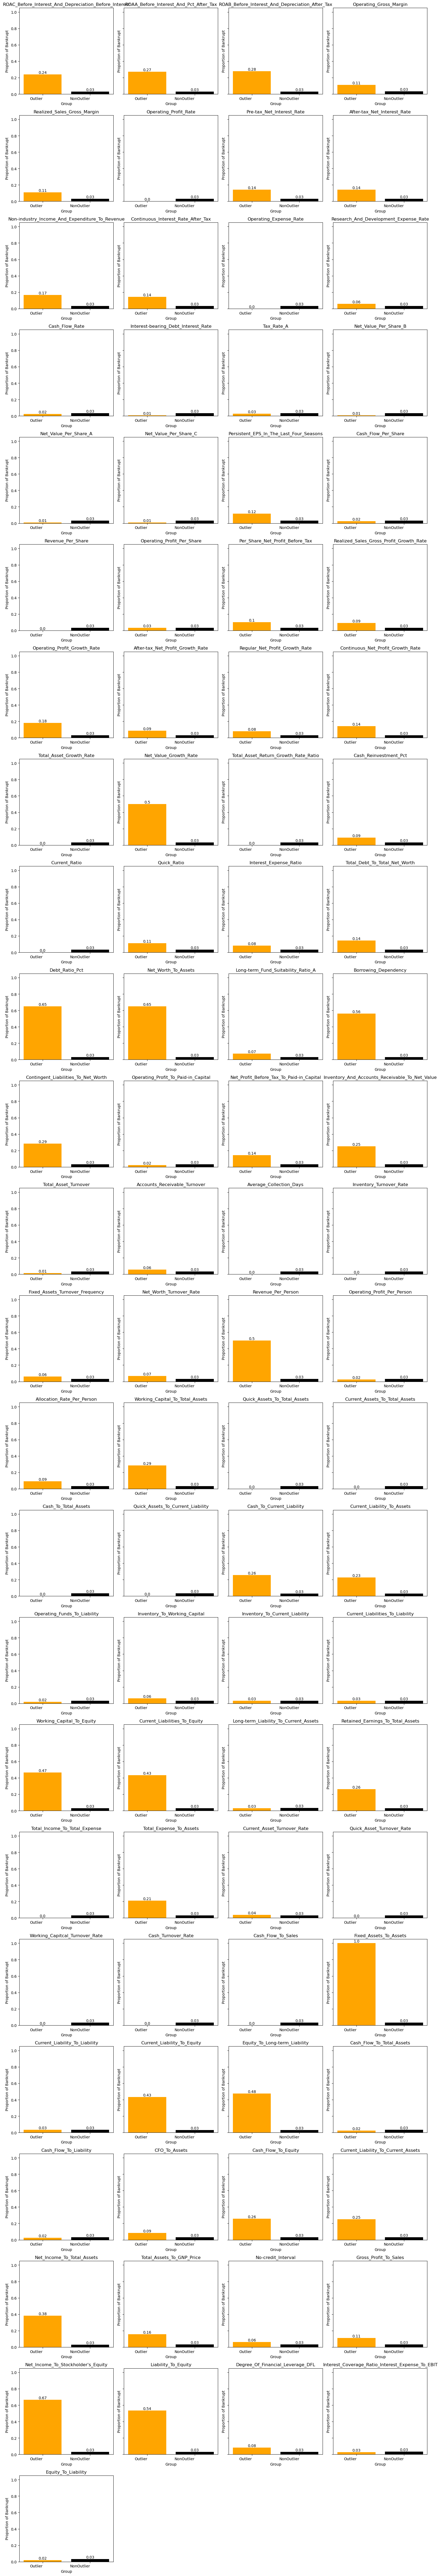

In [36]:
num_features = len(proportions.columns)
num_plots_per_row = 4
num_rows = int(np.ceil(num_features / num_plots_per_row))

fig, axes = plt.subplots(nrows=num_rows, ncols=num_plots_per_row, figsize=(16, 4*num_rows), sharey=True)

# Flatten axes if there's only one row
if num_rows == 1:
    axes = axes.reshape(1, -1)

for idx, col in enumerate(proportions.columns):
    row_idx = idx // num_plots_per_row
    col_idx = idx % num_plots_per_row
    ax = axes[row_idx, col_idx]
    
    # Bar colors
    colors = ['orange' if label == 'Outlier' else 'black' for label in proportions.index]
    
    bars = ax.bar(proportions.index, proportions[col], color=colors)
    
    # Display data values on top of bars
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

    
    ax.set_xlabel('Group')
    ax.set_ylabel('Proportion of Bankrupt')
    ax.set_title(col)
    ax.set_xticks(proportions.index)
    ax.set_xticklabels(proportions.index, ha='right')

# Hide unused axes
for i in range(num_features, num_rows * num_plots_per_row):
    axes.flatten()[i].axis('off')

fig.tight_layout()
plt.show()

In many numerical features, __there is a significant difference in bankruptcy rates between outliers and non-outliers__. This suggests that replacing outliers with different values may not be a good strategy. Therefore, __we will refrain from replacing outliers with different values in future analyses__.

#### 2.2.2.4 Target vs Categorical Feature

We have a categorical feature in our dataset called 'Liability-Assets_Flag', which is 1 if Total Liability exceeds Total Assets and 0 otherwise. Let's explore the relationship between this variable and the target variable.

In [37]:
contingency_table = pd.crosstab(df['Liability-Assets_Flag'], df['Bankrupt'])
contingency_table

Bankrupt                  0    1
Liability-Assets_Flag           
0                      6597  214
1                         2    6

Negative Equity, i.e., cases where Liability-Assets_Flag is 1, is a very rare event among companies. As seen in the contingency table above, out of 6819 data points, occurrences of this event are fewer than 8 instances. However, in these cases, the number of bankruptcies is 6, indicating that 75% of instances of negative equity resulted in bankruptcy. Thus, this feature would play a crucial role when we build models to predict the target variable.

# 3. Feature Engineering<a id='3_Feature Engineering'></a>

In [38]:
df = pd.read_csv("Data//data.csv")

def clean_column_names(col):
    col = col.replace(' (times)', '') # Remove ' (times)'
    col = col.replace(' (Yuan ¥)', '') # Remove ' (Yuan ??)'
    col = col.replace('?', '')  # Remove question marks
    col = col.strip()  # Remove leading and trailing spaces
    col = col.replace(' ', '_')  # Replace spaces with underscores
    col = col.replace('%', 'pct')  # Replace % with 'percent'
    col = col.replace('/', '_to_')  # Replace / with '_to_'
    col = col.replace('(', '')  # Remove opening parentheses
    col = col.replace(')', '')  # Remove closing parentheses
    col = re.sub(r'_([a-z])', lambda x: '_' + x.group(1).upper(), col) # Convert first letter after underscore to uppercase
    return col

# Apply the function to all column names
df.columns = [clean_column_names(col) for col in df.columns]

# Convert binary variables to categorical
binary_columns = ['Bankrupt', 'Net_Income_Flag', 'Liability-Assets_Flag']
df[binary_columns] = df[binary_columns].astype('category')

# Remove features having same values with different names
df.drop(columns = ['Net_Income_Flag', 'Current_Liabilities_To_Equity', 'Current_Liabilities_To_Liability'], inplace=True)

## 3.1 Engineering on Numerical Features <a id='3.1_Engineering_on_Numerical_Features'></a>

### 3.1.1 Train-Test Split

To prevent data leakage, first perform a train-test split. In the case of severe target variable imbalance, use the stratify argument to ensure that each split maintains the same proportion of target variable classes as the original dataset.

In [39]:
X = df.drop(columns=['Bankrupt'])  
y = df['Bankrupt']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(y_train.value_counts()/len(y_train))
print(y_test.value_counts()/len(y_test))

Bankrupt
0    0.967736
1    0.032264
Name: count, dtype: float64
Bankrupt
0    0.967742
1    0.032258
Name: count, dtype: float64


In [40]:
X.head()

ROAC_Before_Interest_And_Depreciation_Before_Interest  \
0                                           0.370594       
1                                           0.464291       
2                                           0.426071       
3                                           0.399844       
4                                           0.465022       

   ROAA_Before_Interest_And_Pct_After_Tax  \
0                                0.424389   
1                                0.538214   
2                                0.499019   
3                                0.451265   
4                                0.538432   

   ROAB_Before_Interest_And_Depreciation_After_Tax  Operating_Gross_Margin  \
0                                         0.405750                0.601457   
1                                         0.516730                0.610235   
2                                         0.472295                0.601450   
3                                         0.457733                0.583541   
4                                         0.522298                0.598783   

   Realized_Sales_Gross_Margin  Operating_Profit_Rate  \
0                     0.601457               0.998969   
1                     0.610235               0.998946   
2                     0.601364               0.998857   
3                     0.583541               0.998700   
4                     0.598783               0.998973   

   Pre-tax_Net_Interest_Rate  After-tax_Net_Interest_Rate  \
0                   0.796887                     0.808809   
1                   0.797380                     0.809301   
2                   0.796403                     0.808388   
3                   0.796967                     0.808966   
4                   0.797366                     0.809304   

   Non-industry_Income_And_Expenditure_To_Revenue  \
0                                        0.302646   
1                                        0.303556   
2                                        0.302035   
3                                        0.303350   
4                                        0.303475   

   Continuous_Interest_Rate_After_Tax  ...  Liability-Assets_Flag  \
0                            0.780985  ...                      0   
1                            0.781506  ...                      0   
2                            0.780284  ...                      0   
3                            0.781241  ...                      0   
4                            0.781550  ...                      0   

   Net_Income_To_Total_Assets  Total_Assets_To_GNP_Price  No-credit_Interval  \
0                    0.716845                   0.009219            0.622879   
1                    0.795297                   0.008323            0.623652   
2                    0.774670                   0.040003            0.623841   
3                    0.739555                   0.003252            0.622929   
4                    0.795016                   0.003878            0.623521   

   Gross_Profit_To_Sales  Net_Income_To_Stockholder's_Equity  \
0               0.601453                            0.827890   
1               0.610237                            0.839969   
2               0.601449                            0.836774   
3               0.583538                            0.834697   
4               0.598782                            0.839973   

   Liability_To_Equity  Degree_Of_Financial_Leverage_DFL  \
0             0.290202                          0.026601   
1             0.283846                          0.264577   
2             0.290189                          0.026555   
3             0.281721                          0.026697   
4             0.278514                          0.024752   

   Interest_Coverage_Ratio_Interest_Expense_To_EBIT  Equity_To_Liability  
0                                          0.564050             0.016469  
1                                          0.570175             0.020794  
2     

### 3.1.2 Normalizing Numeric Features: Min-Max Normalization

In [41]:
# Normalizing Numeric Features: Min-Max Normalization
X_train_num = X_train.select_dtypes(include=['number'])
X_train_cat = X_train[['Liability-Assets_Flag']]
X_test_num = X_test.select_dtypes(include=['number'])
X_test_cat = X_test[['Liability-Assets_Flag']]

# Initialize the scaler and Fit scaler with training numeric features
scaler = MinMaxScaler()
scaler.fit(X_train_num)

# Transform the numerical features in both training and test sets
X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

# Convert scaled numerical features back to DataFrame
X_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns=X_train_num.columns, index=X_train.index)
X_test_num_scaled = pd.DataFrame(X_test_num_scaled, columns=X_test_num.columns, index=X_test.index)

# Combine scaled numerical features with the categorical features
X_train_scaled = pd.concat([X_train_num_scaled, X_train_cat], axis=1)
X_test_scaled = pd.concat([X_test_num_scaled, X_test_cat], axis=1)


In [42]:
X_train_scaled.shape

(5455, 92)

In [43]:
X_train_scaled.head()

ROAC_Before_Interest_And_Depreciation_Before_Interest  \
318                                            0.481189       
5796                                           0.522808       
4454                                           0.514614       
2225                                           0.456508       
3249                                           0.376418       

      ROAA_Before_Interest_And_Pct_After_Tax  \
318                                 0.550153   
5796                                0.590765   
4454                                0.586895   
2225                                0.536851   
3249                                0.443197   

      ROAB_Before_Interest_And_Depreciation_After_Tax  Operating_Gross_Margin  \
318                                          0.528832                0.899832   
5796                                         0.558633                0.901002   
4454                                         0.551487                0.912184   
2225                                         0.504459                0.895097   
3249                                         0.412785                0.999014   

      Realized_Sales_Gross_Margin  Operating_Profit_Rate  \
318                      0.898654               0.998980   
5796                     0.899628               0.999023   
4454                     0.910989               0.999103   
2225                     0.893925               0.998967   
3249                     0.997706               0.995856   

      Pre-tax_Net_Interest_Rate  After-tax_Net_Interest_Rate  \
318                    0.797443                     0.791807   
5796                   0.797454                     0.791812   
4454                   0.797606                     0.791933   
2225                   0.797390                     0.791761   
3249                   0.794096                     0.788379   

      Non-industry_Income_And_Expenditure_To_Revenue  \
318                                         0.257162   
5796                                        0.257087   
4454                                        0.257191   
2225                                        0.257093   
3249                                        0.257894   

      Continuous_Interest_Rate_After_Tax  ...  Net_Income_To_Total_Assets  \
318                             0.781616  ...                    0.806631   
5796                            0.781621  ...                    0.827723   
4454                            0.781718  ...                    0.828627   
2225                            0.781572  ...                    0.797846   
3249                            0.777918  ...                    0.756573   

      Total_Assets_To_GNP_Price  No-credit_Interval  Gross_Profit_To_Sales  \
318                1.666653e-13            0.623661               0.899830   
5796               1.098794e-13            0.624307               0.900998   
4454               2.551415e-13            0.624714               0.912185   
2225               3.156365e-13            0.624621               0.895093   
3249               2.014380e-14            0.624242               0.999011   

      Net_Income_To_Stockholder's_Equity  Liability_To_Equity  \
318                             0.756845             0.164776   
5796                            0.760811             0.172086   
4454                            0.758880             0.165181   
2225                            0.756233             0.173438   
3249                            0.752978             0.163429   

      Degree_Of_Financial_Leverage_DFL  \
318                           0.026814   
5796                          0.026852   
4454                          0.026791   
2225                          0.027673   
3249                          0.026791   

      Interest_Coverage_Ratio_Interest_Expense_To_EBIT  Equity_To_Liability  \
318                                           0.565265             0.070742   
5796                              

### 3.1.3 New Features Generation

#### 3.1.3.1 Ratio between Features

Although there are already 92 features, new features can be created and then selected through feature selection to identify the most useful ones. As observed in the EDA stage, profitability and activity indicators, such as Net Income to Total Assets and Asset Turnover Ratio, and stability indicators like Debt Ratio are expected to be useful for bankruptcy prediction. 

Additionally, if financial stability deteriorates while profitability and activity remains low, the probability of bankruptcy is expected to be higher. Considering this, features created by dividing stability indicators by profitability and activity indicators are likely to improve model performance. 

However, given the large number of possible combinations of those indicators, it is impractical to consider every combination. Moreover, high correlation was observed among features within the same category. Therefore, a few key stability indicators will be used to create new features by dividing them by a representative profitability and activity features, Net_Income_To_Total_Assets and Total_Asset_Turnover.

In [44]:
# New Feature Generation
stability_features = [
    'Debt_Ratio_Pct', 
    'Borrowing_Dependency', 
    'Cash_To_Current_Liability', 
    'Fixed_Assets_To_Assets',
    'Current_Ratio',
    'Quick_Ratio',
    'Total_Debt_To_Total_Net_Worth',
    'Net_Worth_To_Assets',
    'Long-term_Fund_Suitability_Ratio_A',
    'Contingent_Liabilities_To_Net_Worth',
    'Operating_Funds_To_Liability',
    'Current_Liability_To_Assets',
    'Current_Liability_To_Liability',
    'Current_Liability_To_Equity',
    'Long-term_Liability_To_Current_Assets',
    'Retained_Earnings_To_Total_Assets',
    'Liability_To_Equity',
    'Degree_Of_Financial_Leverage_DFL'
]

profitability_feature = 'Net_Income_To_Total_Assets'
activity_feature = 'Total_Asset_Turnover'

# Generate New Features
for feature in stability_features:
    new_feature_name = f'{feature}_To_NIA'
    X_train_scaled[new_feature_name] = (X_train_scaled[feature]+0.1) / (X_train_scaled[profitability_feature]+0.1)
    X_test_scaled[new_feature_name] = (X_test_scaled[feature]+0.1) / (X_test_scaled[profitability_feature]+0.1)
    
for feature in stability_features:
    new_feature_name = f'{feature}_To_ATO'
    X_train_scaled[new_feature_name] = (X_train_scaled[feature]+0.1) / (X_train_scaled[activity_feature]+0.1)
    X_test_scaled[new_feature_name] = (X_test_scaled[feature]+0.1) / (X_test_scaled[activity_feature]+0.1)

In [45]:
X_train_scaled.shape

(5455, 128)

In [46]:
# Rescale Features including newly generated features
X_train_num = X_train_scaled.select_dtypes(include=['number'])
X_train_cat = X_train_scaled[['Liability-Assets_Flag']] 

X_test_num = X_test_scaled.select_dtypes(include=['number'])
X_test_cat = X_test_scaled[['Liability-Assets_Flag']]

# Initialize the scaler and Fit scaler with training numeric features
scaler = StandardScaler()
scaler.fit(X_train_num)

# Transform the numerical features in both training and test sets
X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

# Convert scaled numerical features back to DataFrame
X_train_num_scaled = pd.DataFrame(scaler.transform(X_train_num), columns=X_train_num.columns)
X_test_num_scaled = pd.DataFrame(scaler.transform(X_test_num), columns=X_test_num.columns)

# Combine scaled numerical features with the categorical features
X_train_scaled = pd.concat([X_train_num_scaled, X_train_cat.reset_index(drop=True)], axis=1)
X_test_scaled = pd.concat([X_test_num_scaled, X_test_cat.reset_index(drop=True)], axis=1)

In [47]:
X_train_scaled.head()

ROAC_Before_Interest_And_Depreciation_Before_Interest  \
0                                          -0.176677       
1                                           0.496220       
2                                           0.363741       
3                                          -0.575729       
4                                          -1.870631       

   ROAA_Before_Interest_And_Pct_After_Tax  \
0                               -0.117303   
1                                0.504173   
2                                0.444945   
3                               -0.320846   
4                               -1.753995   

   ROAB_Before_Interest_And_Depreciation_After_Tax  Operating_Gross_Margin  \
0                                        -0.135577               -0.542117   
1                                         0.333551               -0.496455   
2                                         0.221065               -0.060126   
3                                        -0.519251               -0.726880   
4                                        -1.962388                3.328187   

   Realized_Sales_Gross_Margin  Operating_Profit_Rate  \
0                    -0.541389               0.014704   
1                    -0.503294               0.017875   
2                    -0.058848               0.023791   
3                    -0.726363               0.013707   
4                     3.333334              -0.215758   

   Pre-tax_Net_Interest_Rate  After-tax_Net_Interest_Rate  \
0                   0.016414                     0.016847   
1                   0.017367                     0.017245   
2                   0.030626                     0.027844   
3                   0.011745                     0.012834   
4                  -0.275531                    -0.282722   

   Non-industry_Income_And_Expenditure_To_Revenue  \
0                                       -0.007591   
1                                       -0.013713   
2                                       -0.005259   
3                                       -0.013214   
4                                        0.051511   

   Continuous_Interest_Rate_After_Tax  ...  \
0                            0.014885  ...   
1                            0.015315  ...   
2                            0.024135  ...   
3                            0.010887  ...   
4                           -0.318496  ...   

   Contingent_Liabilities_To_Net_Worth_To_ATO  \
0                                   -0.362729   
1                                   -1.657855   
2                                   -0.145872   
3                                   -0.790737   
4                                    2.728161   

   Operating_Funds_To_Liability_To_ATO  Current_Liability_To_Assets_To_ATO  \
0                            -0.362977                           -0.778076   
1                            -1.690611                           -1.202410   
2                            -0.081274                           -0.577103   
3                            -0.811649                            0.291133   
4                             1.591047                            0.626918   

   Current_Liability_To_Liability_To_ATO  Current_Liability_To_Equity_To_ATO  \
0                              -0.110488                           -0.399941   
1                              -1.457142                           -1.701251   
2                              -0.135072                           -0.167640   
3                              -0.089712                           -0.742929   
4                               4.139132                            2.724848   

   Long-term_Liability_To_Current_Assets_To_ATO  \
0                                     -0.261335   
1                                     -0.927291   
2                                     -0.146058   
3                                     -0.473459   
4                                      1.313105   

   Retained_Earnings_To_Total_Assets_To_ATO 

#### 3.1.3.2 Outlier Dummy Features

During the exploratory data analysis (EDA), it was observed that outliers in some features were significant for predicting the target variable. Therefore, dummy features were created to indicate whether these variables were outliers, particularly those with a high bankruptcy ratio.

The process involved creating dummy variables based on outlier detection for numerical features in the dataset. First, the z-scores for each numerical feature were calculated to standardize the data, which allows for the identification of outliers. An outlier was defined as a data point with a z-score above or below a certain threshold, typically 3 or -3. For each feature, a dummy variable was created where a value of 1 was assigned if the data point was an outlier, and 0 otherwise.

In [48]:
def create_outlier_dummies(X_train_scaled, y_train, X_test_scaled, threshold, prop):
    """
    Create outlier dummy variables for numerical features and apply to training and test data.

    Returns:
    pd.DataFrame: Training data with outlier dummy variables.
    pd.DataFrame: Test data with outlier dummy variables.
    """
    # Ensure both X_train_scaled and X_test_scaled are DataFrames
    if not isinstance(X_train_scaled, pd.DataFrame) or not isinstance(X_test_scaled, pd.DataFrame):
        raise ValueError("X_train_scaled and X_test_scaled must be pandas DataFrames.")
    
    # Ensure y_train is a Series
    if not isinstance(y_train, pd.Series):
        raise ValueError("y_train must be a pandas Series.")
    
    # Convert y_train to numeric if it's categorical
    if y_train.dtype.name == 'category':
        y_train = y_train.cat.codes

    # Ensure the indices align
    y_train = y_train.reindex(X_train_scaled.index)

    # Identify numerical features
    numerical_features = X_train_scaled.select_dtypes(include=[np.number]).columns.tolist()
    
    # Initialize DataFrames for dummy variables
    X_train_dummies = X_train_scaled.copy()
    X_test_dummies = X_test_scaled.copy()

    for feature in numerical_features:
        # Get the feature values
        feature_train_values = X_train_scaled[feature]
        feature_test_values = X_test_scaled[feature]

        # Determine outliers
        pos_outliers_train = feature_train_values > threshold
        neg_outliers_train = feature_train_values < -threshold
        pos_outliers_test = feature_test_values > threshold
        neg_outliers_test = feature_test_values < -threshold
        
        # Calculate proportions
        pos_outlier_proportion = y_train[pos_outliers_train].mean() if pos_outliers_train.any() else 0
        neg_outlier_proportion = y_train[neg_outliers_train].mean() if neg_outliers_train.any() else 0

        # Determine if outliers are significant
        pos_outlier_significant = pos_outlier_proportion > prop * 3
        neg_outlier_significant = neg_outlier_proportion > prop * 3

        # Create dummy variables
        if pos_outlier_significant:
            X_train_dummies[f'{feature}_pos_outlier_D'] = np.where(pos_outliers_train, 1, 0)
            X_test_dummies[f'{feature}_pos_outlier_D'] = np.where(pos_outliers_test, 1, 0)

        if neg_outlier_significant:
            X_train_dummies[f'{feature}_neg_outlier_D'] = np.where(neg_outliers_train, 1, 0)
            X_test_dummies[f'{feature}_neg_outlier_D'] = np.where(neg_outliers_test, 1, 0)

    return X_train_dummies, X_test_dummies

In [49]:
X_train_with_dummies, X_test_with_dummies = create_outlier_dummies(
    X_train_scaled, y_train, X_test_scaled, threshold=2, prop=0.032
)

In [50]:
Dummies = [col for col in X_train_with_dummies.columns if col.endswith('_D')]
X_train_with_dummies['prop_dummy'] = X_train_with_dummies[Dummies].mean(axis=1)
X_test_with_dummies['prop_dummy'] = X_test_with_dummies[Dummies].mean(axis=1)

In [51]:
print(X_train_with_dummies.shape)
print(X_test_with_dummies.shape)

(5455, 158)
(1364, 158)


# 4. Modeling<a id='4_Modeling'></a>

## 4.1 Balancing Data Using SMOTE <a id='4.1 Balancing_Data_Using_SMOTE'></a>

As previously discussed, our target variable is highly imbalanced, with only 3.2% of the observations being 1 and the rest being 0. If this imbalance is not addressed, issues such as bias towards the majority class and overfitting may arise during feature selection or modeling. 

Therefore, we will use SMOTE to address the imbalance. SMOTE is an oversampling technique that resolves the problem of data imbalance by generating additional data for the minority class in imbalanced datasets.

In [52]:
# One-hot encoding categorical variable
encoder = OneHotEncoder(sparse_output=False, drop='first')
X_train_cat = X_train_with_dummies[['Liability-Assets_Flag']]
X_train_cat_encoded = encoder.fit_transform(X_train_cat)
X_test_cat = X_test_with_dummies[['Liability-Assets_Flag']]
X_test_cat_encoded = encoder.fit_transform(X_test_cat)

# transform the encoding result to dataframe
X_train_cat_encoded = pd.DataFrame(X_train_cat_encoded, columns=encoder.get_feature_names_out(), index=X_train_scaled.index)
X_test_cat_encoded = pd.DataFrame(X_test_cat_encoded, columns=encoder.get_feature_names_out(), index=X_test_scaled.index)

X_train_with_dummies['Liability-Assets_Flag'] = X_train_cat_encoded
X_test_with_dummies['Liability-Assets_Flag'] = X_test_cat_encoded

In [53]:
# SMOTE 
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_with_dummies, y_train)

## 4.2 Model Building (1): Feature Selection Using Lasso Regression

### 4.2.1 Feature Selection using Lasso Regression

The dataset includes a total of 158 features, comprising 157 numerical features and 1 categorical feature, including the original features and newly created ones. To prevent overfitting, reduce computational costs, and improve model interpretability, it is necessary to perform feature selection. In this section, feature selection will be conducted using LASSO regression.

In [54]:
#_______ Lasso Regression
# Find optimal alpha via grid search
alphas = alphas = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 1]
lasso = Lasso(random_state=42, max_iter=1000)

param_grid = {'alpha': alphas}
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_balanced, y_train_balanced)

best_alpha = grid_search.best_params_['alpha']
print(f"Optimal alpha: {best_alpha}")

Optimal alpha: 0.005


In [55]:
best_lasso_model = grid_search.best_estimator_
print(f"Selected features with optimal alpha: {best_lasso_model}")
selected_features = X_train_balanced.columns[best_lasso_model.coef_ != 0]
print(selected_features)
print(f"Number of Selected Features: {len(selected_features)}")

Selected features with optimal alpha: Lasso(alpha=0.005, random_state=42)
Index(['ROAB_Before_Interest_And_Depreciation_After_Tax',
       'Operating_Expense_Rate', 'Tax_Rate_A', 'Net_Value_Per_Share_B',
       'Persistent_EPS_In_The_Last_Four_Seasons', 'Operating_Profit_Per_Share',
       'Realized_Sales_Gross_Profit_Growth_Rate',
       'Regular_Net_Profit_Growth_Rate', 'Total_Asset_Growth_Rate',
       'Cash_Reinvestment_Pct', 'Total_Debt_To_Total_Net_Worth',
       'Debt_Ratio_Pct', 'Borrowing_Dependency',
       'Inventory_And_Accounts_Receivable_To_Net_Value',
       'Accounts_Receivable_Turnover', 'Inventory_Turnover_Rate',
       'Fixed_Assets_Turnover_Frequency', 'Net_Worth_Turnover_Rate',
       'Revenue_Per_Person', 'Operating_Profit_Per_Person',
       'Cash_To_Total_Assets', 'Quick_Assets_To_Current_Liability',
       'Current_Liability_To_Assets', 'Operating_Funds_To_Liability',
       'Inventory_To_Working_Capital', 'Current_Asset_Turnover_Rate',
       'Quick_Asset_Turn

Through feature selection using Lasso regression, 51 features were selected for modeling, which is less than a third of the original 158 features. We will now proceed with modeling using the 51 selected features and the balanced dataset containing 10,558 observations.

Next, we will visualize the selected features along with their Lasso regression coefficients.

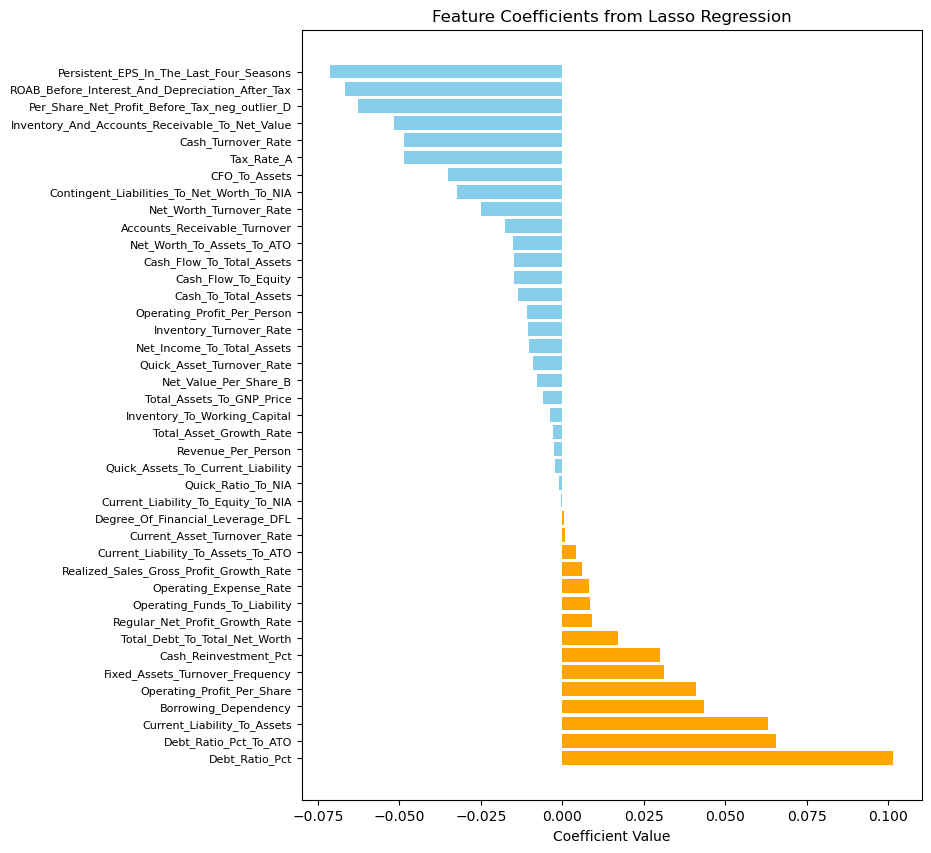

In [56]:
# Visualizing Feature Selection Result
features = X_train_balanced.columns
coefficients = best_lasso_model.coef_
importance_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
importance_df = importance_df[importance_df['Coefficient'] != 0]
importance_df = importance_df.sort_values(by='Coefficient', ascending=False)

colors = ['orange' if coeff > 0 else 'skyblue' for coeff in importance_df['Coefficient']]

plt.figure(figsize=(8, 10))
bars = plt.barh(importance_df['Feature'], importance_df['Coefficient'], color=colors)
plt.xlabel('Coefficient Value')
plt.title('Feature Coefficients from Lasso Regression')
plt.yticks(fontsize=8)
plt.show()

In [57]:
X_train_selected = X_train_balanced[selected_features]
X_test_selected = X_test_with_dummies[selected_features]

### 4.2.2  Model Building 
<br>
Now, we will model using various algorithms and compare their performance to select the best-performing model. The algorithms to be used include Logistic Regression, Random Forest, SVM, XGBoost, LightGBM, and Balanced Random Forest.

#### 4.2.2.1  Evaluation Metrics Selection <a id='4.3.1  Evaluation_Metrics_Selection'></a> 

When evaluating the costs associated with False Negatives (FN) and False Positives (FP) in the context of bank loan or credit investment, two main aspects are crucial:

* _False Negative Costs_:
1) Principal Recovery Issues: An FN occurs when a loan is issued to a company that will actually default, but the model incorrectly predicts that it will not. This can lead to significant losses, including the inability to recover the principal and interest.
2) Severity of Costs: The costs associated with FN can be severe. These include not only the loss of the principal and interest but also additional costs such as recovery expenses, legal fees, and damage to reputation. These costs can multiply significantly compared to the initial loss.

* _False Positive Costs_:
1) Opportunity Cost: An FP happens when a company that will not default is incorrectly predicted to default, resulting in the rejection of a loan. This can lead to opportunity costs, as the bank or investor might miss out on potential returns from this company.
2) Relative Opportunity Cost: While FP can lead to missed opportunities, these costs are generally much smaller compared to FN costs. This is because, if the rejected company does not default, the financial impact of not lending to it might be limited. Additionally, rejecting a loan can sometimes lead to finding better investment opportunities or managing risk more effectively.

* _Comparing FN and FP Costs_:

1) Higher FN Costs: If FN costs are significantly higher than FP costs, it becomes crucial to minimize FNs. In this case, prioritizing recall and adjusting the model to reduce FN occurrences is essential for effective risk management. It may be acceptable to tolerate some increase in FP to reduce FN.
2) Smaller Opportunity Cost for FP: The opportunity cost of FP might be relatively small compared to the potential financial loss from an FN. Moreover, rejecting loans that would not result in defaults might lead to safer or more profitable investments.

Therefore, accuracy or metrics that evaluate recall and precision with equal weight, such as the F1 score, are insufficient as performance metrics. Considering the magnitude of costs associated with FN and FP, we will use the F4 score in this analysis.

#### 4.2.2.2  Logistic Regression

In [58]:
# customize score function 
beta = 4 # Assign more weight to recall than precision
f_scorer = make_scorer(fbeta_score, beta=beta)

In [59]:
logreg = LogisticRegression(class_weight={0: 1, 1: 10}, random_state=42)

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': [500, 1000, 1500, 2000, 3000]
}

grid_search = GridSearchCV(estimator=logreg, 
                           param_grid=param_grid, cv=5, scoring=f_scorer, n_jobs=-1)
grid_search.fit(X_train_selected, y_train_balanced)

best_logreg = grid_search.best_estimator_


In [60]:
y_pred_logreg = best_logreg.predict(X_test_selected)
y_prob_logreg = best_logreg.predict_proba(X_test_selected)[:, 1]

# Set threshold
threshold = 0.50
y_pred_logreg_custom = (y_prob_logreg >= threshold).astype(int)

# Evaluation
print(f"Best Parameters: {grid_search.best_params_}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_logreg_custom))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg_custom))
print("\nf Score: ", fbeta_score(y_test, y_pred_logreg_custom, beta=beta))

Best Parameters: {'C': 10, 'max_iter': 500, 'solver': 'lbfgs'}

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.73      0.84      1320
           1       0.10      0.91      0.18        44

    accuracy                           0.73      1364
   macro avg       0.55      0.82      0.51      1364
weighted avg       0.97      0.73      0.82      1364


Confusion Matrix:
 [[959 361]
 [  4  40]]

f Score:  0.6153846153846154


#### 4.2.2.3  Random Forest Model 

In [61]:
rf = RandomForestClassifier(random_state=42)

param_grid_rf = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search_rf = GridSearchCV(estimator=rf, 
                              param_grid=param_grid_rf, 
                              cv=5, 
                              scoring=f_scorer, 
                              n_jobs=-1)
grid_search_rf.fit(X_train_selected, y_train_balanced)

best_rf = grid_search_rf.best_estimator_

C:\Users\james\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [62]:
y_pred_rf = best_rf.predict(X_test_selected)
y_prob_rf = best_rf.predict_proba(X_test_selected)[:, 1]

# Set threshold
threshold = 0.50
y_pred_rf_custom = (y_prob_rf >= threshold).astype(int)

# Evaluation
print(f"Best Parameters: {grid_search_rf.best_params_}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf_custom))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_custom))
print("\nf Score: ", fbeta_score(y_test, y_pred_rf_custom, beta=beta))

Best Parameters: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98      1320
           1       0.40      0.55      0.46        44

    accuracy                           0.96      1364
   macro avg       0.69      0.76      0.72      1364
weighted avg       0.97      0.96      0.96      1364


Confusion Matrix:
 [[1284   36]
 [  20   24]]

f Score:  0.5340314136125655


#### 4.2.2.4  Light Gradient Boosting Model

In [63]:
lgbm = lgb.LGBMClassifier(random_state=42)

param_grid_lgbm = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [1, 10, 20, 30],
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'num_leaves': [31, 63, 127],
    'min_child_samples': [10, 20, 30]
}

grid_search_lgbm = GridSearchCV(estimator=lgbm, 
                                param_grid=param_grid_lgbm, 
                                cv=5, 
                                scoring=f_scorer, 
                                n_jobs=-1)

grid_search_lgbm.fit(X_train_selected, y_train_balanced)

best_lgbm = grid_search_lgbm.best_estimator_


[LightGBM] [Info] Number of positive: 5279, number of negative: 5279
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002297 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10202
[LightGBM] [Info] Number of data points in the train set: 10558, number of used features: 41
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

In [64]:
y_pred_lgbm = best_lgbm.predict(X_test_selected)
y_prob_lgbm = best_lgbm.predict_proba(X_test_selected)[:, 1]

# Set threshold
threshold = 0.50
y_pred_lgbm_custom = (y_prob_lgbm >= threshold).astype(int)

# Evaluation
print(f"Best Parameters: {grid_search_lgbm.best_params_}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_lgbm_custom))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lgbm_custom))
print("\nf Score: ", fbeta_score(y_test, y_pred_lgbm_custom, beta=beta))

Best Parameters: {'learning_rate': 0.2, 'max_depth': 10, 'min_child_samples': 20, 'n_estimators': 200, 'num_leaves': 31}

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1320
           1       0.39      0.43      0.41        44

    accuracy                           0.96      1364
   macro avg       0.68      0.70      0.69      1364
weighted avg       0.96      0.96      0.96      1364


Confusion Matrix:
 [[1290   30]
 [  25   19]]

f Score:  0.42895086321381143


#### 4.2.2.5 XGBoost

In [65]:
#__________XGBoost

xgb_model = xgb.XGBClassifier(random_state=42)

param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

grid_search_xgb = GridSearchCV(estimator=xgb_model, 
                               param_grid=param_grid_xgb, 
                               cv=5, 
                               scoring=f_scorer, 
                               n_jobs=-1,
                               verbose=1)

grid_search_xgb.fit(X_train_selected, y_train_balanced)
best_xgb = grid_search_xgb.best_estimator_

Fitting 5 folds for each of 729 candidates, totalling 3645 fits


In [66]:
y_pred_xgb = best_xgb.predict(X_test_selected)
y_prob_xgb = best_xgb.predict_proba(X_test_selected)[:, 1]

# Set threshold
threshold = 0.50
y_pred_xgb_custom = (y_prob_xgb >= threshold).astype(int)

# Evaluation
print(f"Best Parameters: {grid_search_xgb.best_params_}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb_custom))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb_custom))
print("\nf Score: ", fbeta_score(y_test, y_pred_xgb_custom, beta=beta))

Best Parameters: {'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.7}

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98      1320
           1       0.38      0.55      0.44        44

    accuracy                           0.96      1364
   macro avg       0.68      0.76      0.71      1364
weighted avg       0.96      0.96      0.96      1364


Confusion Matrix:
 [[1280   40]
 [  20   24]]

f Score:  0.53125


#### 4.2.2.6  Balanced Random Forest with Unbalanced Data

Balanced Random Forest is a variation of the traditional Random Forest algorithm designed to handle imbalanced datasets. In imbalanced datasets, one class (e.g., non-bankruptcy) is significantly more frequent than the other (e.g., bankruptcy). BRF addresses this by creating balanced bootstrap samples for each tree in the forest, where the minority class is oversampled, or the majority class is undersampled, to ensure an equal representation of both classes.

BRF enhances performance on imbalanced data, provides a robust model, and offers better generalization capabilities.

In [67]:
# brf with selected features
X_train_unbal_selected = X_train_with_dummies[selected_features]
X_test_unbal_selected = X_test_with_dummies[selected_features]

brf = BalancedRandomForestClassifier(random_state=42)

param_grid_brf = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search_brf = GridSearchCV(estimator=brf, 
                               param_grid=param_grid_brf, 
                               cv=5, 
                               scoring=f_scorer, 
                               n_jobs=-1)

grid_search_brf.fit(X_train_unbal_selected, y_train)


best_brf = grid_search_brf.best_estimator_

C:\Users\james\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\james\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


In [68]:
y_pred_brf = best_brf.predict(X_test_unbal_selected)
y_prob_brf = best_brf.predict_proba(X_test_unbal_selected)[:, 1]

# Set threshold
threshold = 0.50
y_pred_brf_custom = (y_prob_brf >= threshold).astype(int)

# Evaluation
print(f"Best Parameters: {grid_search_brf.best_params_}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_brf_custom))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_brf_custom))
print("\nf Score: ", fbeta_score(y_test, y_pred_brf_custom, beta=beta))

Best Parameters: {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.85      0.92      1320
           1       0.17      0.86      0.28        44

    accuracy                           0.85      1364
   macro avg       0.58      0.86      0.60      1364
weighted avg       0.97      0.85      0.90      1364


Confusion Matrix:
 [[1128  192]
 [   6   38]]

f Score:  0.6916488222698073


In [69]:
# Initialize an empty dictionary to store the results
results = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F4 Score": []
}

# Function to evaluate the model and store the results
def evaluate_model(name, y_true, y_pred, beta):
    report = classification_report(y_true, y_pred, output_dict=True)
    f4_score = fbeta_score(y_true, y_pred, beta=beta)
    
    results["Model"].append(name)
    results["Accuracy"].append(report['accuracy'])
    results["Precision"].append(report['1']['precision'])  
    results["Recall"].append(report['1']['recall'])
    results["F4 Score"].append(f4_score)

evaluate_model("Logistic Regression", y_test, y_pred_logreg_custom, beta=4)
evaluate_model("Random Forest", y_test, y_pred_rf_custom, beta=4)
evaluate_model("LightGBM", y_test, y_pred_lgbm_custom, beta=4)
evaluate_model("XGBoost", y_test, y_pred_xgb_custom, beta=4)
evaluate_model("Balanced Random Forest", y_test, y_pred_brf_custom, beta=4)

results_df = pd.DataFrame(results)

results_df.set_index("Model", inplace=True)

print(results_df)

                        Accuracy  Precision    Recall  F4 Score
Model                                                          
Logistic Regression     0.732405   0.099751  0.909091  0.615385
Random Forest           0.958944   0.400000  0.545455  0.534031
LightGBM                0.959677   0.387755  0.431818  0.428951
XGBoost                 0.956012   0.375000  0.545455  0.531250
Balanced Random Forest  0.854839   0.165217  0.863636  0.691649


## 4.3 Model Building (2): Feature Selection Using Random Forest

### 4.3.1 Feature Selection using Random Forest

In [70]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_balanced, y_train_balanced)

feature_importances = rf.feature_importances_

importance_df = pd.DataFrame({
    'Feature': X_train_balanced.columns,
    'Importance': feature_importances
})


In [71]:
importance_df.sort_values(by="Importance", ascending=False)

Feature  Importance
91                     Debt_Ratio_Pct_To_NIA    0.060224
92               Borrowing_Dependency_To_NIA    0.054133
39                      Borrowing_Dependency    0.050819
107               Liability_To_Equity_To_NIA    0.048893
18   Persistent_EPS_In_The_Last_Four_Seasons    0.042187
..                                       ...         ...
127                    Liability-Assets_Flag    0.000000
73                    Fixed_Assets_To_Assets    0.000000
50                        Revenue_Per_Person    0.000000
29                     Net_Value_Growth_Rate    0.000000
136              Current_Ratio_pos_outlier_D    0.000000

[158 rows x 2 columns]

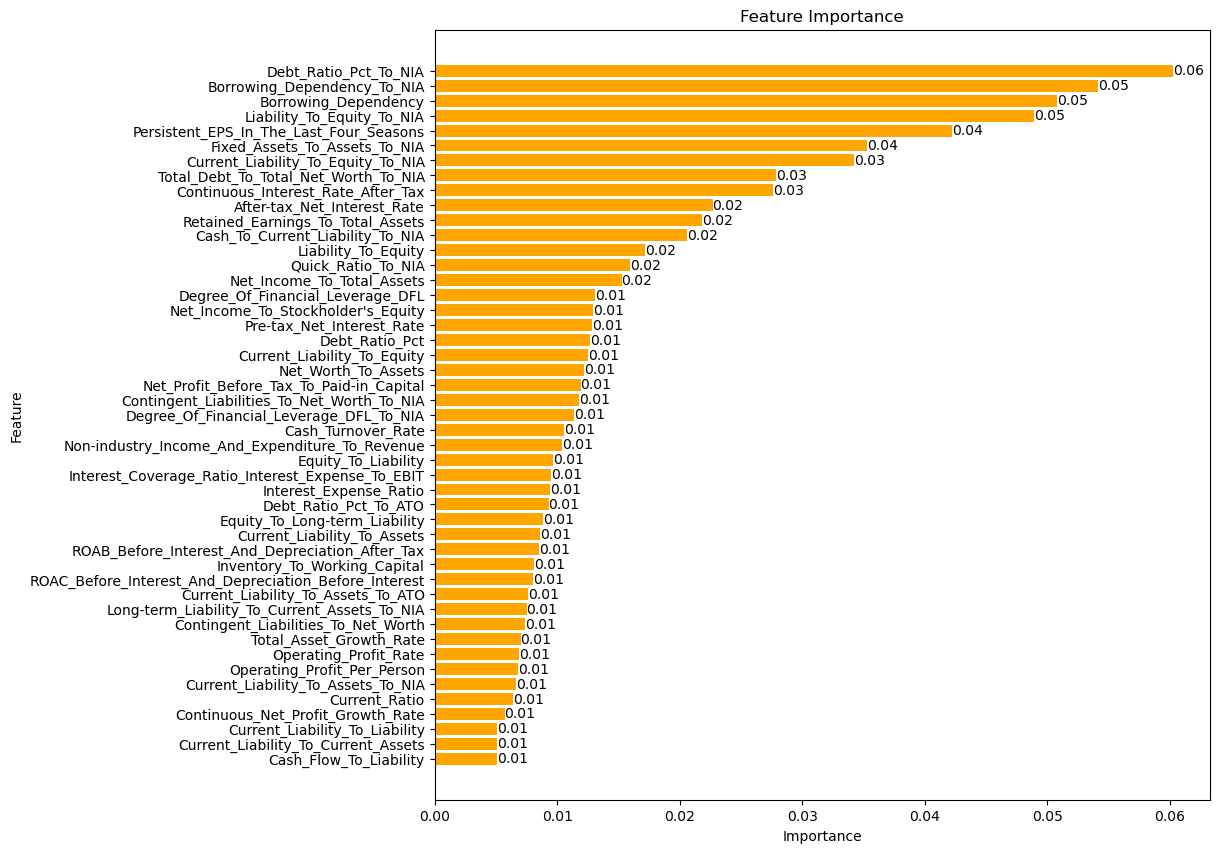

In [72]:
# Plot feature importance
threshold = 0.005

importance_df_filtered = importance_df[importance_df["Importance"] > threshold]
importance_df_sorted = importance_df_filtered.sort_values(by="Importance", ascending=False)

colors = ['orange' for _ in importance_df_sorted["Importance"]]

plt.figure(figsize=(10, 10))  # Figure 크기를 조정 (y축의 항목이 줄어들므로 높이도 줄임)
plt.barh(importance_df_sorted["Feature"], importance_df_sorted["Importance"], 
         color=colors)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()

for index, value in enumerate(importance_df_sorted["Importance"]):
    plt.text(value, index, f'{value:.2f}', va='center', color='black')

plt.show()

In [73]:
selected_features_rf = importance_df[importance_df['Importance'] > threshold]['Feature']

In [74]:
len(selected_features_rf)

47

In [75]:
selected_features_rf

0      ROAC_Before_Interest_And_Depreciation_Before_I...
2        ROAB_Before_Interest_And_Depreciation_After_Tax
5                                  Operating_Profit_Rate
6                              Pre-tax_Net_Interest_Rate
7                            After-tax_Net_Interest_Rate
8         Non-industry_Income_And_Expenditure_To_Revenue
9                     Continuous_Interest_Rate_After_Tax
18               Persistent_EPS_In_The_Last_Four_Seasons
27                     Continuous_Net_Profit_Growth_Rate
28                               Total_Asset_Growth_Rate
32                                         Current_Ratio
34                                Interest_Expense_Ratio
36                                        Debt_Ratio_Pct
37                                   Net_Worth_To_Assets
39                                  Borrowing_Dependency
40                   Contingent_Liabilities_To_Net_Worth
42              Net_Profit_Before_Tax_To_Paid-in_Capital
51                           Op

In [76]:
X_train_selected = X_train_balanced[selected_features_rf]
X_test_selected = X_test_with_dummies[selected_features_rf]

### 4.3.2  Model Building 

#### 4.3.2.1  Logistic Regression 

In [77]:
logreg = LogisticRegression(random_state=42)

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': [50, 100, 150, 200, 250, 300, 400, 500, 1000]
}

grid_search = GridSearchCV(estimator=logreg, 
                           param_grid=param_grid, cv=5, scoring=f_scorer, n_jobs=-1)
grid_search.fit(X_train_selected, y_train_balanced)

best_logreg = grid_search.best_estimator_


In [78]:
y_pred_logreg = best_logreg.predict(X_test_selected)
y_prob_logreg = best_logreg.predict_proba(X_test_selected)[:, 1]

# Set threshold
threshold = 0.50
y_pred_logreg_custom = (y_prob_logreg >= threshold).astype(int)

# Evaluation
print(f"Best Parameters: {grid_search.best_params_}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_logreg_custom))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg_custom))
print("\nf Score: ", fbeta_score(y_test, y_pred_logreg_custom, beta=beta))

Best Parameters: {'C': 0.001, 'max_iter': 50, 'solver': 'liblinear'}

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.79      0.88      1320
           1       0.13      0.91      0.22        44

    accuracy                           0.80      1364
   macro avg       0.56      0.85      0.55      1364
weighted avg       0.97      0.80      0.86      1364


Confusion Matrix:
 [[1047  273]
 [   4   40]]

f Score:  0.6686332350049164


#### 4.3.2.2   Random Forest Model 

In [79]:
rf = RandomForestClassifier(random_state=42)

param_grid_rf = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search_rf = GridSearchCV(estimator=rf, 
                              param_grid=param_grid_rf, 
                              cv=5, 
                              scoring=f_scorer, 
                              n_jobs=-1)
grid_search_rf.fit(X_train_selected, y_train_balanced)

best_rf = grid_search_rf.best_estimator_

In [80]:
y_pred_rf = best_rf.predict(X_test_selected)
y_prob_rf = best_rf.predict_proba(X_test_selected)[:, 1]

# Set threshold
threshold = 0.50
y_pred_rf_custom = (y_prob_rf >= threshold).astype(int)

# Evaluation
print(f"Best Parameters: {grid_search_rf.best_params_}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf_custom))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_custom))
print("\nf Score: ", fbeta_score(y_test, y_pred_rf_custom, beta=beta))

Best Parameters: {'bootstrap': False, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      1320
           1       0.43      0.57      0.49        44

    accuracy                           0.96      1364
   macro avg       0.71      0.77      0.74      1364
weighted avg       0.97      0.96      0.96      1364


Confusion Matrix:
 [[1287   33]
 [  19   25]]

f Score:  0.5577427821522309


#### 4.3.2.3   Light Gradient Boosting Model

In [81]:
lgbm = lgb.LGBMClassifier(random_state=42)

param_grid_lgbm = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [1, 10, 20, 30],
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'num_leaves': [31, 63, 127],
    'min_child_samples': [10, 20, 30]
}

grid_search_lgbm = GridSearchCV(estimator=lgbm, 
                                param_grid=param_grid_lgbm, 
                                cv=5, 
                                scoring=f_scorer, 
                                n_jobs=-1)

grid_search_lgbm.fit(X_train_selected, y_train_balanced)

best_lgbm = grid_search_lgbm.best_estimator_


[LightGBM] [Info] Number of positive: 5279, number of negative: 5279
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002739 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11985
[LightGBM] [Info] Number of data points in the train set: 10558, number of used features: 47
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

In [82]:
y_pred_lgbm = best_lgbm.predict(X_test_selected)
y_prob_lgbm = best_lgbm.predict_proba(X_test_selected)[:, 1]

# Set threshold
threshold = 0.50
y_pred_lgbm_custom = (y_prob_lgbm >= threshold).astype(int)

# Evaluation
print(f"Best Parameters: {grid_search_lgbm.best_params_}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_lgbm_custom))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lgbm_custom))
print("\nf Score: ", fbeta_score(y_test, y_pred_lgbm_custom, beta=beta))

Best Parameters: {'learning_rate': 0.2, 'max_depth': 20, 'min_child_samples': 10, 'n_estimators': 200, 'num_leaves': 63}

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1320
           1       0.43      0.52      0.47        44

    accuracy                           0.96      1364
   macro avg       0.71      0.75      0.73      1364
weighted avg       0.97      0.96      0.96      1364


Confusion Matrix:
 [[1290   30]
 [  21   23]]

f Score:  0.5165125495376486


#### 4.3.2.4   XGBoost

In [83]:
#__________XGBoost

xgb_model = xgb.XGBClassifier(random_state=42)

param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

grid_search_xgb = GridSearchCV(estimator=xgb_model, 
                               param_grid=param_grid_xgb, 
                               cv=5, 
                               scoring=f_scorer, 
                               n_jobs=-1,
                               verbose=1)

grid_search_xgb.fit(X_train_selected, y_train_balanced)
best_xgb = grid_search_xgb.best_estimator_

Fitting 5 folds for each of 729 candidates, totalling 3645 fits


In [84]:
y_pred_xgb = best_xgb.predict(X_test_selected)
y_prob_xgb = best_xgb.predict_proba(X_test_selected)[:, 1]

# Set threshold
threshold = 0.50
y_pred_xgb_custom = (y_prob_xgb >= threshold).astype(int)

# Evaluation
print(f"Best Parameters: {grid_search_xgb.best_params_}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb_custom))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb_custom))
print("\nf Score: ", fbeta_score(y_test, y_pred_xgb_custom, beta=beta))

Best Parameters: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.7}

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      1320
           1       0.42      0.57      0.48        44

    accuracy                           0.96      1364
   macro avg       0.70      0.77      0.73      1364
weighted avg       0.97      0.96      0.96      1364


Confusion Matrix:
 [[1285   35]
 [  19   25]]

f Score:  0.556282722513089


#### 4.3.2.5   Balanced Random Forest with Unbalanced Data

In [85]:
# brf with selected features
X_train_unbal_selected = X_train_with_dummies[selected_features_rf]
X_test_unbal_selected = X_test_with_dummies[selected_features_rf]

brf = BalancedRandomForestClassifier(random_state=42)

param_grid_brf = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search_brf = GridSearchCV(estimator=brf, 
                               param_grid=param_grid_brf, 
                               cv=5, 
                               scoring='f1', 
                               n_jobs=-1)

grid_search_brf.fit(X_train_unbal_selected, y_train)


best_brf = grid_search_brf.best_estimator_

C:\Users\james\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\james\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


In [86]:
y_pred_brf = best_brf.predict(X_test_unbal_selected)
y_prob_brf = best_brf.predict_proba(X_test_unbal_selected)[:, 1]

# Set threshold
threshold = 0.50
y_pred_brf_custom = (y_prob_brf >= threshold).astype(int)

# Evaluation
print(f"Best Parameters: {grid_search_brf.best_params_}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_brf_custom))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_brf_custom))
print("\nf Score: ", fbeta_score(y_test, y_pred_brf_custom, beta=beta))

Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.86      0.92      1320
           1       0.17      0.89      0.29        44

    accuracy                           0.86      1364
   macro avg       0.58      0.87      0.61      1364
weighted avg       0.97      0.86      0.90      1364


Confusion Matrix:
 [[1134  186]
 [   5   39]]

f Score:  0.7136706135629709


In [87]:
# Initialize an empty dictionary to store the results
results = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F4 Score": []
}

evaluate_model("Logistic Regression", y_test, y_pred_logreg_custom, beta=4)
evaluate_model("Random Forest", y_test, y_pred_rf_custom, beta=4)
evaluate_model("LightGBM", y_test, y_pred_lgbm_custom, beta=4)
evaluate_model("XGBoost", y_test, y_pred_xgb_custom, beta=4)
evaluate_model("Balanced Random Forest", y_test, y_pred_brf_custom, beta=4)

results_df = pd.DataFrame(results)

results_df.set_index("Model", inplace=True)

print(results_df)

                        Accuracy  Precision    Recall  F4 Score
Model                                                          
Logistic Regression     0.796921   0.127796  0.909091  0.668633
Random Forest           0.961877   0.431034  0.568182  0.557743
LightGBM                0.962610   0.433962  0.522727  0.516513
XGBoost                 0.960411   0.416667  0.568182  0.556283
Balanced Random Forest  0.859971   0.173333  0.886364  0.713671


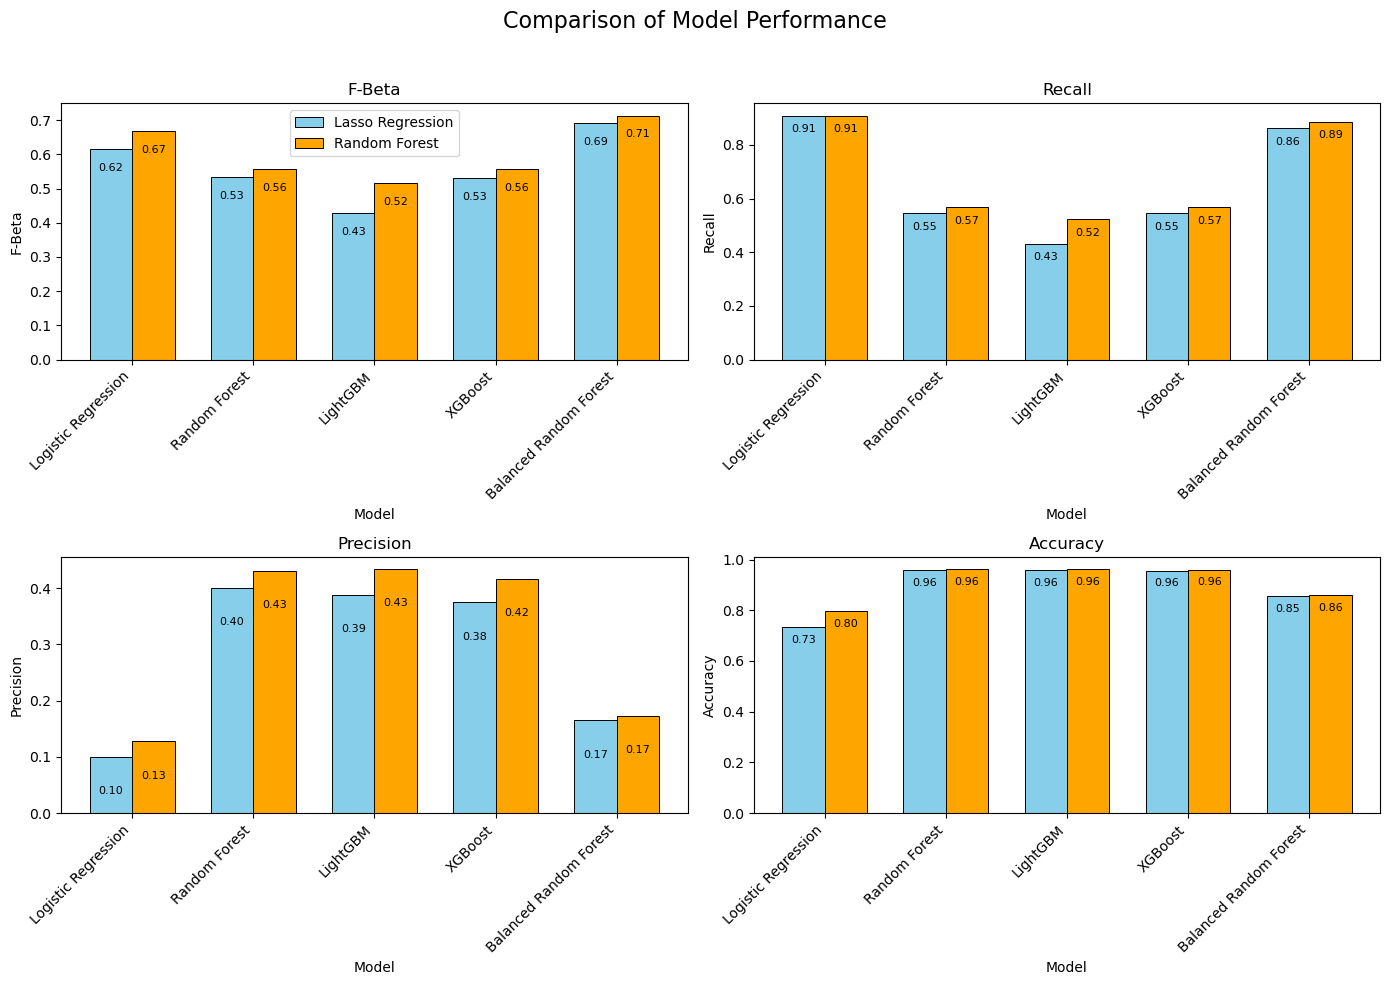

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data from the first table (Lasso Regression)
data_lasso = {
    "Model": ["Logistic Regression", "Random Forest", "LightGBM", "XGBoost", "Balanced Random Forest"],
    "Accuracy": [0.732405, 0.958944, 0.959677, 0.956012, 0.854839],
    "Precision": [0.099751, 0.400000, 0.387755, 0.375000, 0.165217],
    "Recall": [0.909091, 0.545455, 0.431818, 0.545455, 0.863636],
    "F-Beta": [0.615385, 0.534031, 0.428951, 0.531250, 0.691649]
}

# Data from the second table (Random Forest)
data_rf = {
    'Model': ['Logistic Regression', 'Random Forest', 'LightGBM', 'XGBoost', 'Balanced Random Forest'],
    'Accuracy': [0.796921, 0.961877, 0.962610, 0.960411, 0.859971],
    'Precision': [0.127796, 0.431034, 0.433962, 0.416667, 0.173333],
    'Recall': [0.909091, 0.568182, 0.522727, 0.568182, 0.886364],
    'F-Beta': [0.668633, 0.557743, 0.516513, 0.556283, 0.713671]
}

# Convert dictionaries to DataFrames
df_lasso = pd.DataFrame(data_lasso)
df_rf = pd.DataFrame(data_rf)

# Metrics and models to plot
metrics = ['F-Beta', 'Recall', 'Precision', 'Accuracy']
models = df_lasso['Model']

# Set up the bar width and positions
bar_width = 0.35
index = np.arange(len(models))

# Colors
colors_lasso = 'skyblue'
colors_rf = 'orange'
edgecolor = 'black'
linewidth = 0.7

# Plot each metric for both feature selection methods
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Comparison of Model Performance', fontsize=16)

for i, metric in enumerate(metrics):
    ax = axs[i//2, i%2]
    bars_lasso = ax.bar(index, df_lasso[metric], bar_width, color=colors_lasso, edgecolor=edgecolor, linewidth=linewidth, label='Lasso Regression')
    bars_rf = ax.bar(index + bar_width, df_rf[metric], bar_width, color=colors_rf, edgecolor=edgecolor, linewidth=linewidth, label='Random Forest')

    # Add value labels inside the top of each bar
    for bars in [bars_lasso, bars_rf]:
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width() / 2, height - 0.07, f'{height:.2f}', ha='center', va='bottom', fontsize=8, color='black')

    ax.set_xlabel('Model')
    ax.set_ylabel(metric)
    ax.set_title(metric)
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(models, rotation=45, ha='right')

    # Show legend only in the first subplot
    if i == 0:
        ax.legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

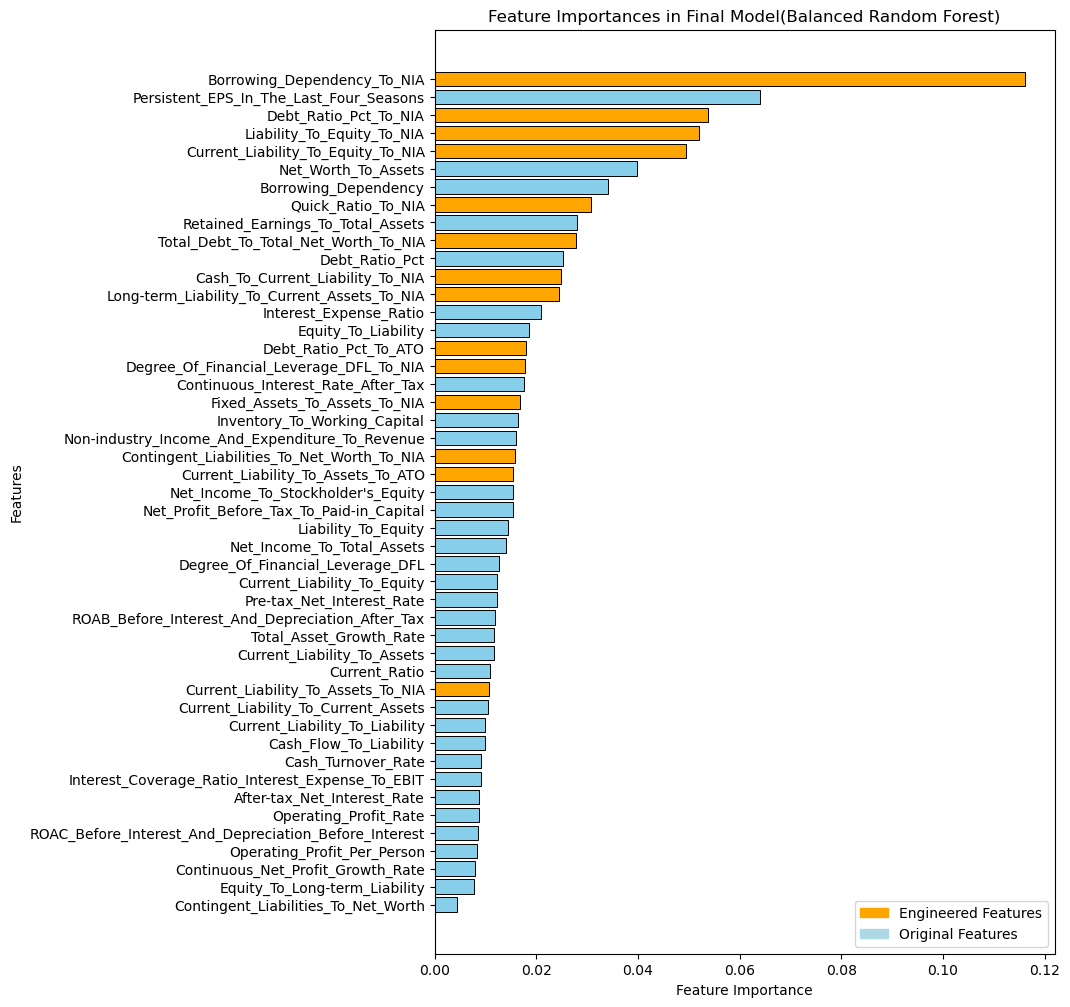

In [101]:
# Separate features into Engineered_Features and Original_Features
engineered_features = [feature for feature in X_train_unbal_selected.columns if feature.endswith('NIA') or feature.endswith('ATO')]
original_features = [feature for feature in X_train_unbal_selected.columns if feature not in engineered_features]

# Get feature importances from the best estimator
feature_importances = best_brf.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Get the sorted feature names
sorted_features = X_train_unbal_selected.columns[indices]
sorted_importances = feature_importances[indices]

# Assign colors: orange for Engineered_Features, skyblue for Original_Features
colors = ['orange' if feature in engineered_features else 'skyblue' for feature in sorted_features]

# Plot the bar graph for the top n features (e.g., top 20)
plt.figure(figsize=(8, 12))
plt.barh(sorted_features, sorted_importances, color=colors, edgecolor=edgecolor, linewidth=linewidth, align='center')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances in Final Model(Balanced Random Forest)')

# Add legend for the color-coding
import matplotlib.patches as mpatches
orange_patch = mpatches.Patch(color='orange', label='Engineered Features')
lightblue_patch = mpatches.Patch(color='lightblue', label='Original Features')
plt.legend(handles=[orange_patch, lightblue_patch])

plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

## 4.4 Insights and Conclusion

1. Lasso vs. Random Forest Feature Selection:

Logistic Regression benefits the most from Random Forest feature selection, improving both precision and the F4 score. This suggests Random Forest feature selection better aligns with Logistic Regression’s strengths.
For models like LightGBM and XGBoost, the differences are subtle but generally favor Random Forest feature selection, implying that it better captures the nuances of the data.

2. Balanced Random Forest:

While its accuracy is not the highest with 86.0%, its high recall(88.6%) and F4 score(0.713) highlight its effectiveness in identifying bankrupt companies. It's particularly useful if recall is prioritized in the application.
The Random Forest feature selection further boosts its performance, making it a strong candidate for scenarios where missing a bankrupt company is costly.

3. Model Recommendations:

If precision is crucial (e.g., avoiding false positives): Random Forest or LightGBM would be better choices. However, in bankruptcy prediction models, considering the significant asymmetry in costs associated with incorrect predictions (False Negatives vs. False Positives), recall is of utmost importance. Therefore, it is reasonable to select the model with the highest F-score that prioritizes recall. From this perspective, Balanced Random Forest or Logistic Regression would be preferred, with Balanced Random Forest offering a better trade-off when using the F4 score.
